<a href="https://colab.research.google.com/github/AbdillahiAwo/AbdillahiAwo/blob/main/Awo_ALab_Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 10-Lab 8. Classification**

**Objective:**

To develop a predictive model using the provided churn dataset that accurately identifies
customers likely to exit

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Churn.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

##**Part 1: Data Understanding**
Exploratory Data Analysis (EDA):

*   Identify missing values.
*   Summarize the main characteristics with descriptive statistics.
*   Perform a preliminary analysis of the relationships between variables, especially with the target variable.

Visualization:
*   Create visualizations to understand the distribution of key variables.
*   Use plots to explore the relationship between features and the target variable.

####**Exploratory Data Analysis**

In [5]:
#Identify missing values.

missing_values = df.isnull().sum()
print(missing_values)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
#Summarize the main characteristics with descriptive statistics.

summary_stats = df.describe()
print(summary_stats)

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

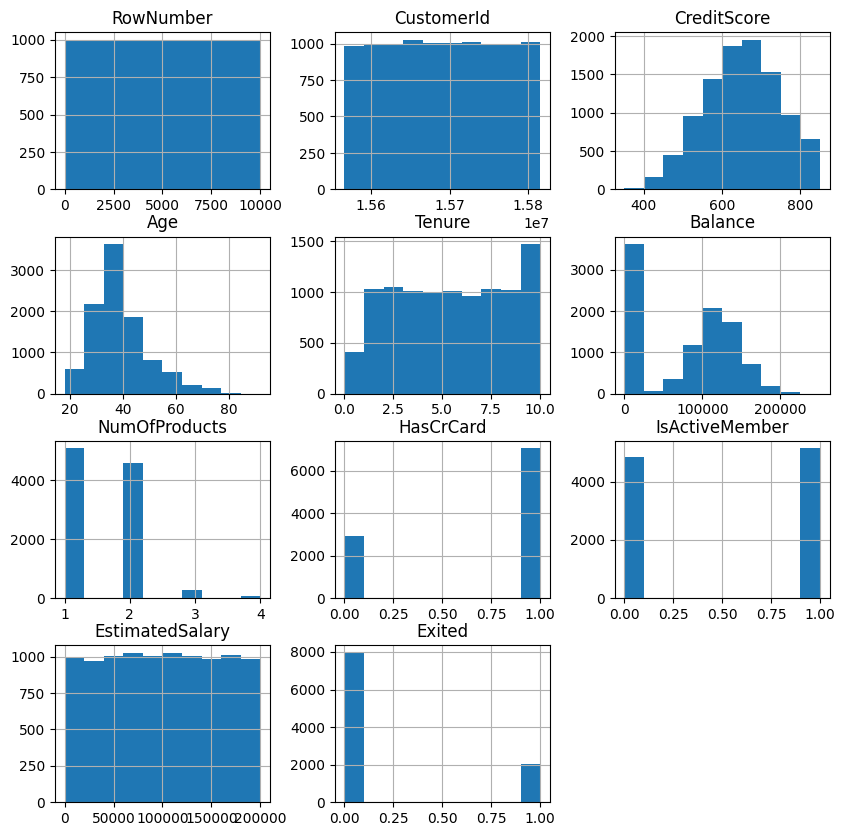

In [7]:
#Perform a preliminary analysis of the relationships between variables, especially with the target variable.

# Summary description
print(df.describe())

# Visualize distributions of numerical variables
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10))
plt.show()


####**Visualization**

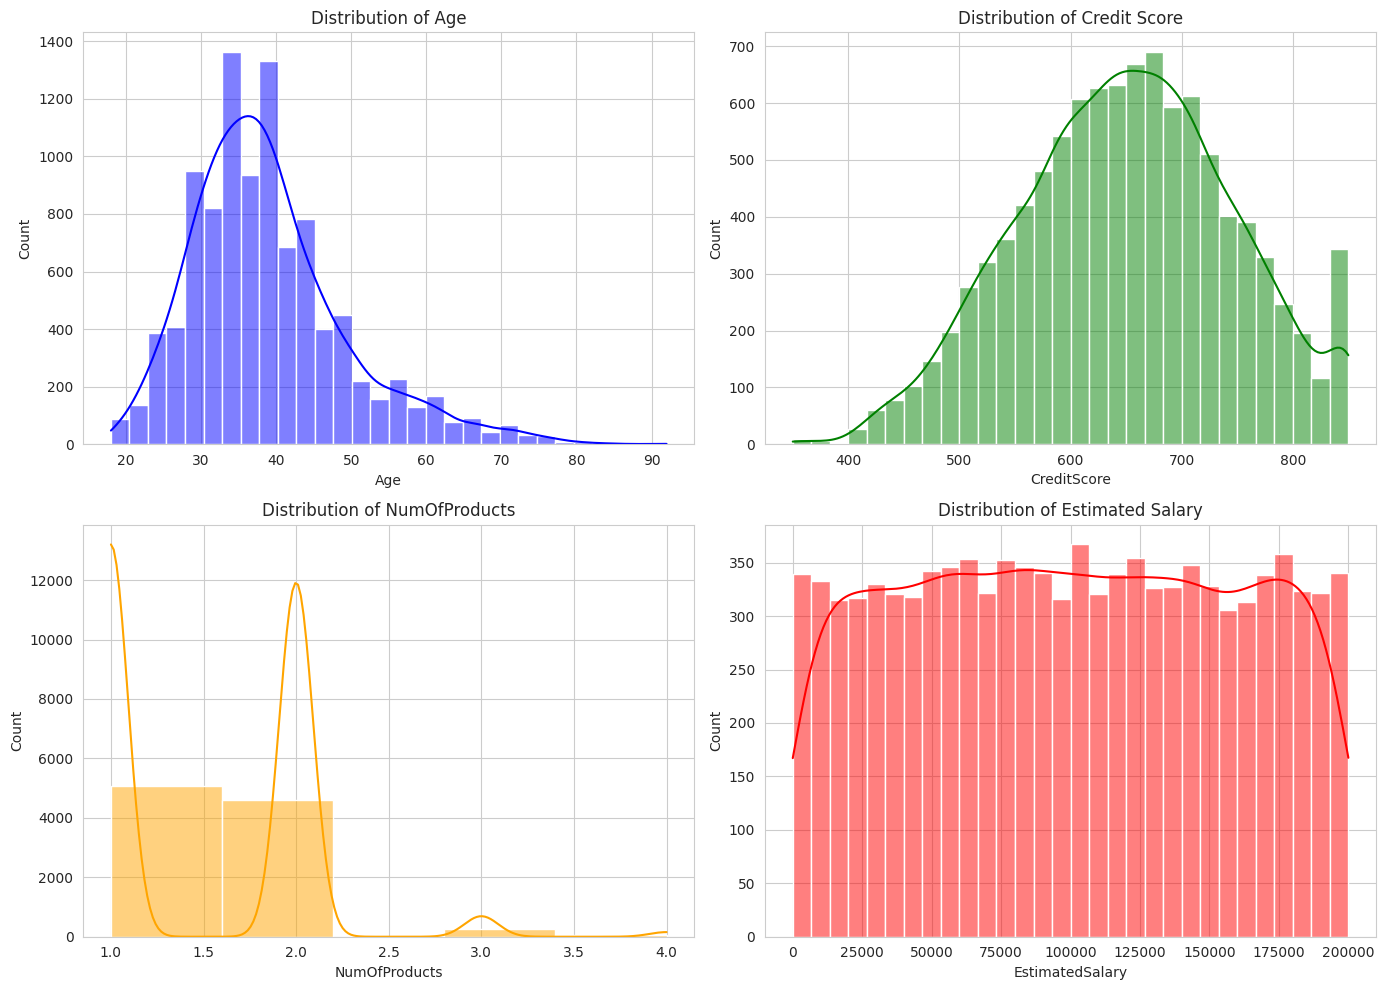

In [17]:
# Create visualizations to understand the distribution of key variables.


# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of Age
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Age')

# Distribution of Credit Score
sns.histplot(df['CreditScore'], bins=30, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Credit Score')

# Distribution of NumOfProducts
sns.histplot(df['NumOfProducts'], bins=5, kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribution of NumOfProducts')

# Distribution of Estimated Salary
sns.histplot(df['EstimatedSalary'], bins=30, kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Distribution of Estimated Salary')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

##**Part 2: Data Preprocessing**
Cleaning:

*   Handle missing values appropriately through imputation or removal.
*   Detect and correct anomalies and outliers, if any.

Transformation:
*   Normalize or standardize numerical features if required.
*   Encode categorical variables using one-hot encoding or label encoding.

Feature Engineering:
*   Generate new features that might improve model performance
*   Perform feature selection to identify the most relevant features.

####**Cleaning**

In [31]:
# Handle missing values appropriately through imputation or removal.

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['CreditScore'].fillna(df['CreditScore'].median(), inplace=True)
df['NumOfProducts'].fillna(df['NumOfProducts'].mode()[0], inplace=True)
df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean(), inplace=True)

df.dropna(axis=0, inplace=True)

df.dropna(axis=1, inplace=True)
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender   Age  \
0           1.0  15634602.0   Hargrave        619.0    France  Female  42.0   
1           2.0  15647311.0       Hill        608.0     Spain  Female  41.0   
2           3.0  15619304.0       Onio        502.0    France  Female  42.0   
3           4.0  15701354.0       Boni        699.0    France  Female  39.0   
4           5.0  15737888.0   Mitchell        850.0     Spain  Female  43.0   
...         ...         ...        ...          ...       ...     ...   ...   
9995     9996.0  15606229.0   Obijiaku        771.0    France    Male  39.0   
9996     9997.0  15569892.0  Johnstone        516.0    France    Male  35.0   
9997     9998.0  15584532.0        Liu        709.0    France  Female  36.0   
9998     9999.0  15682355.0  Sabbatini        772.0   Germany    Male  42.0   
9999    10000.0  15628319.0     Walker        792.0    France  Female  28.0   

      Tenure    Balance  NumOfProducts  HasCrCard  

In [63]:
df_data_cleaned = df.dropna()
df_data_cleaned.shape

(10000, 14)

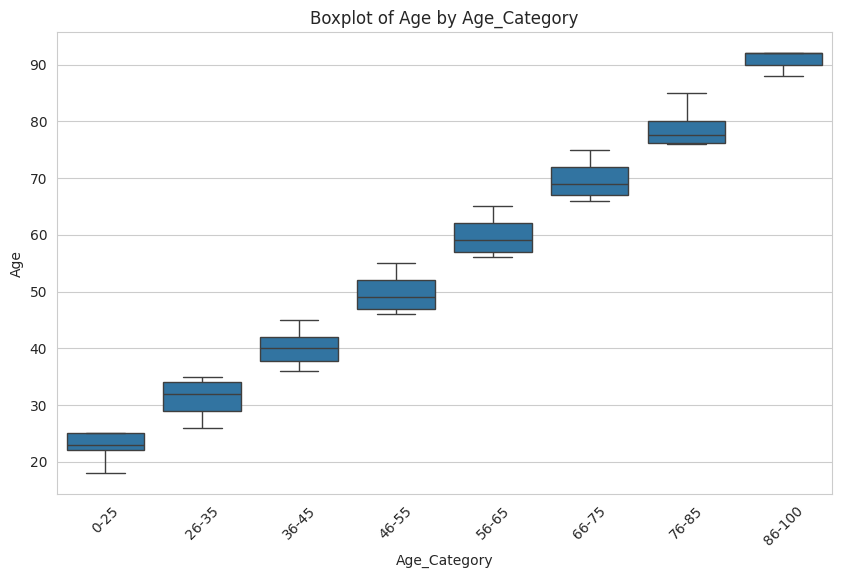

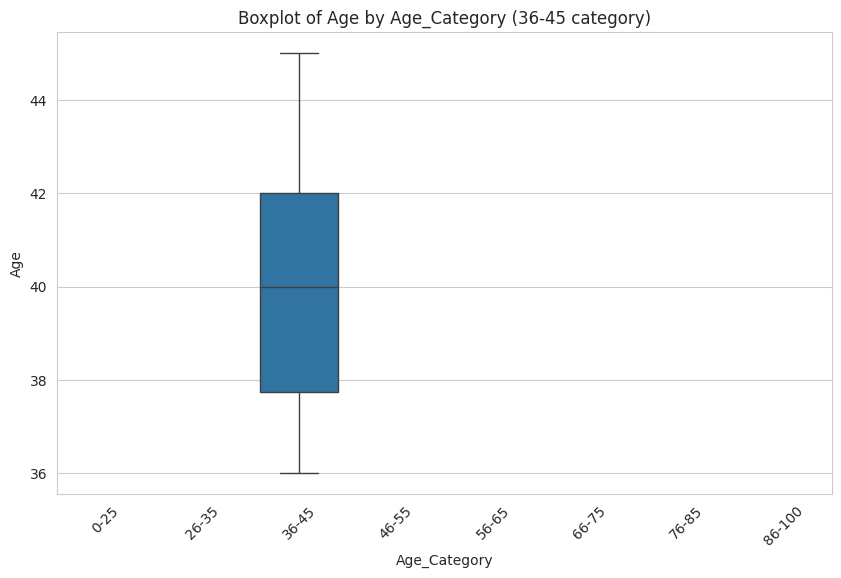

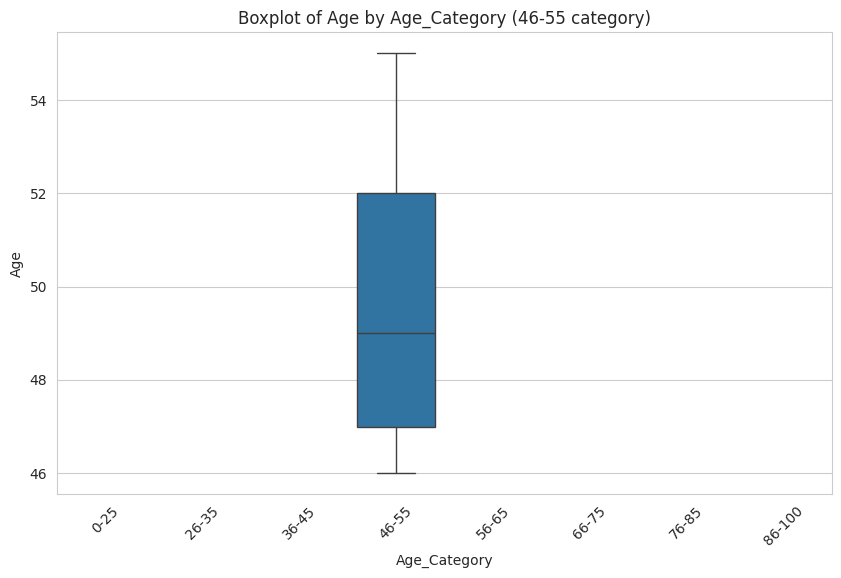

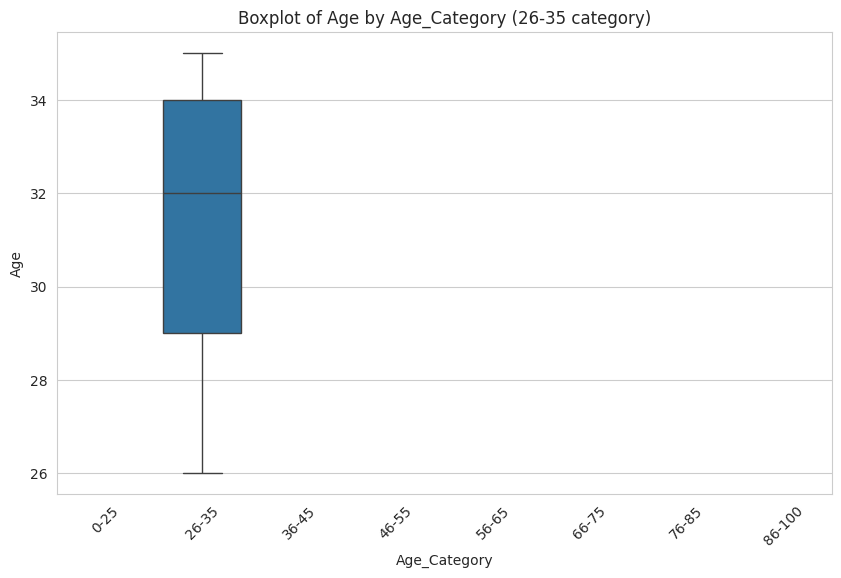

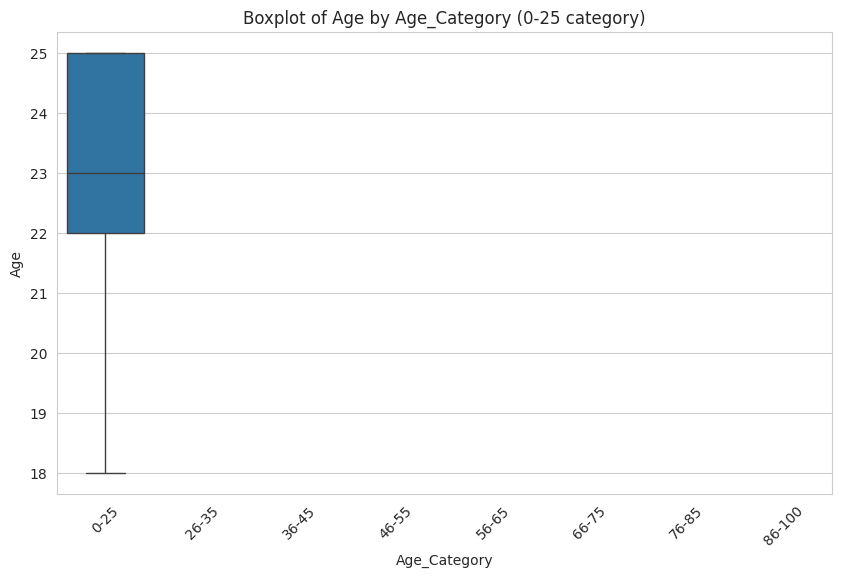

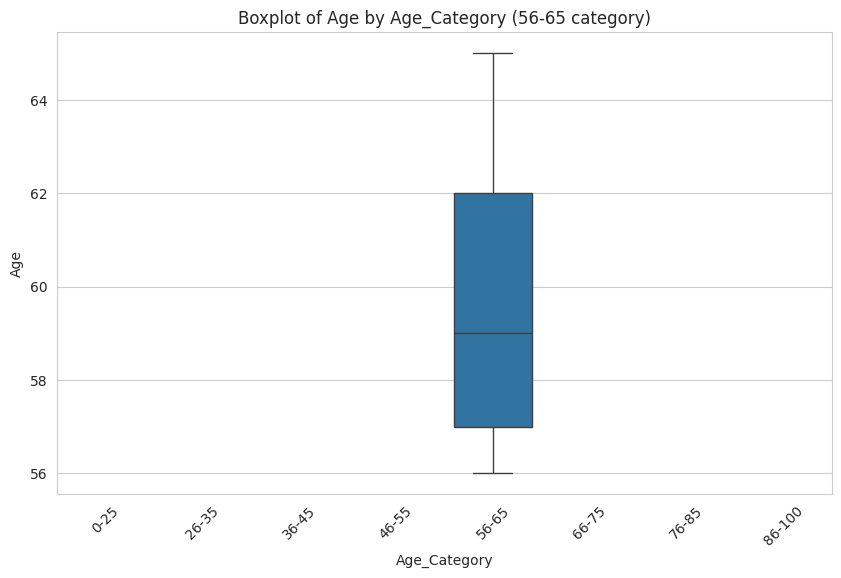

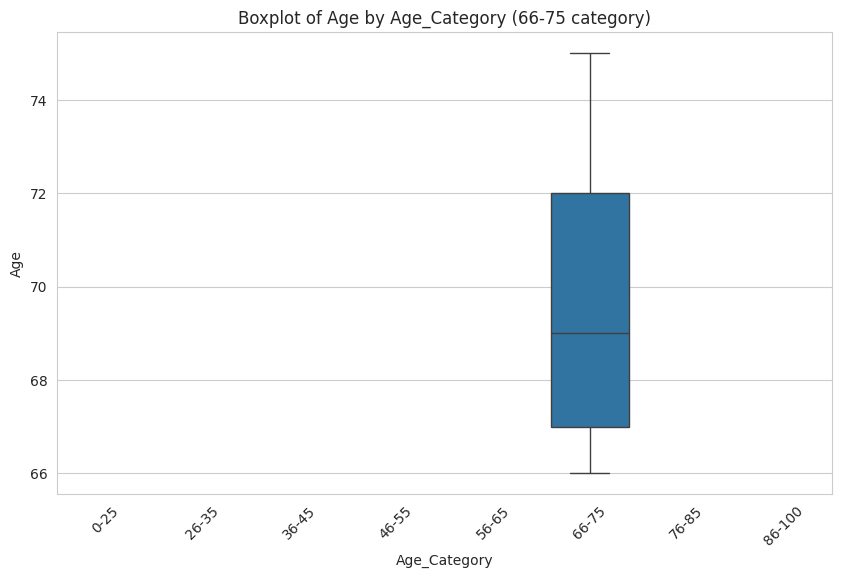

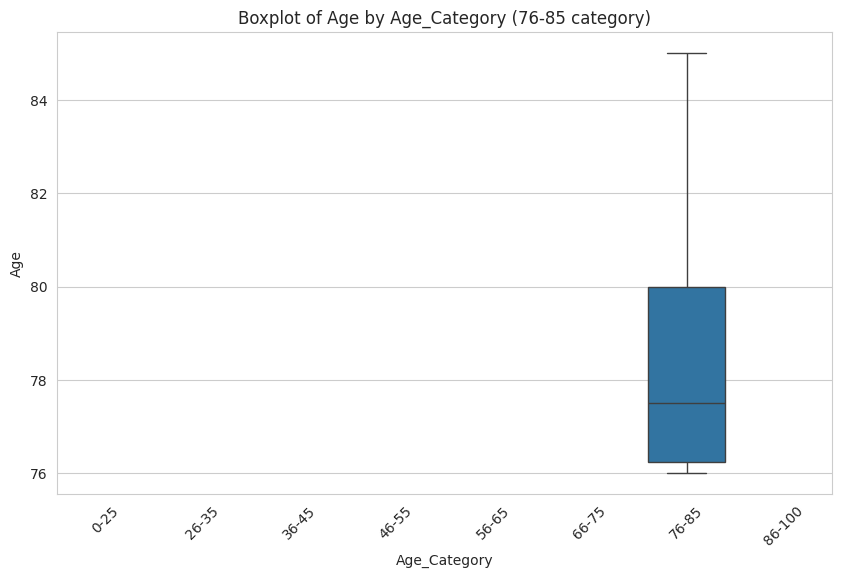

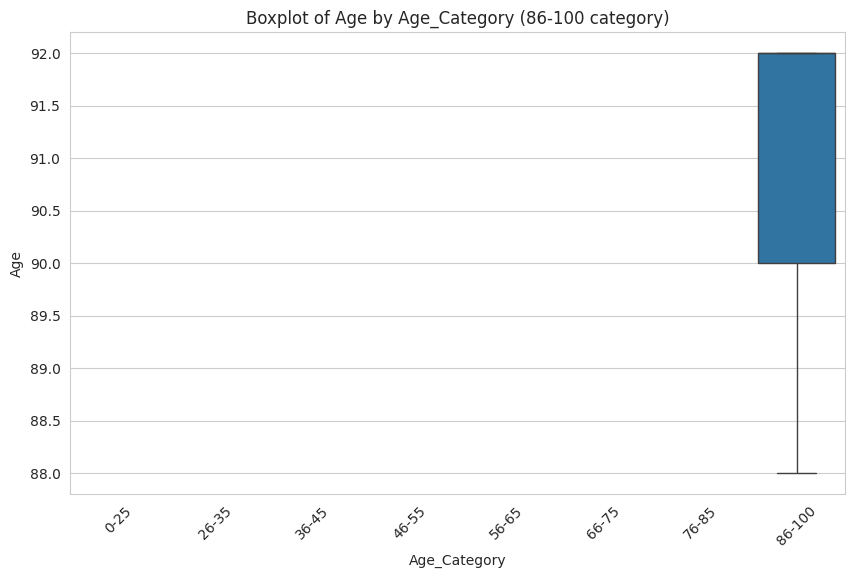

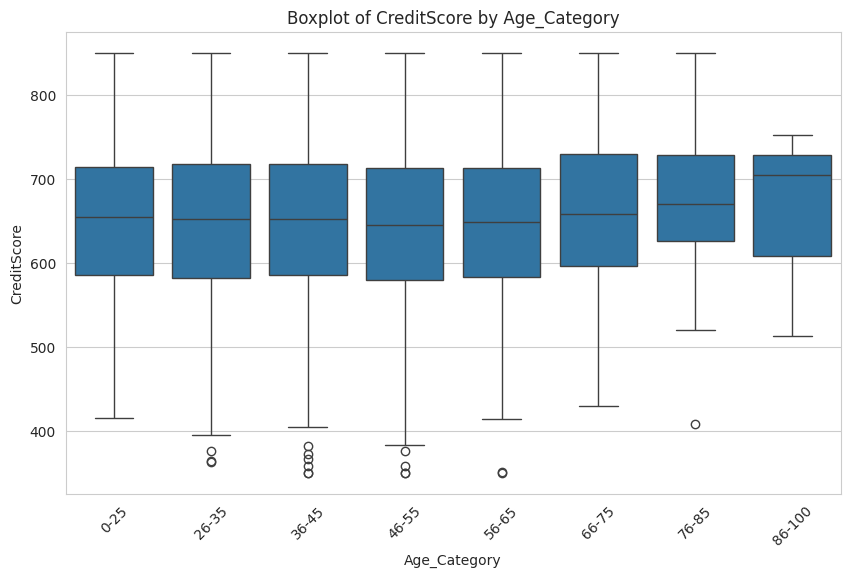

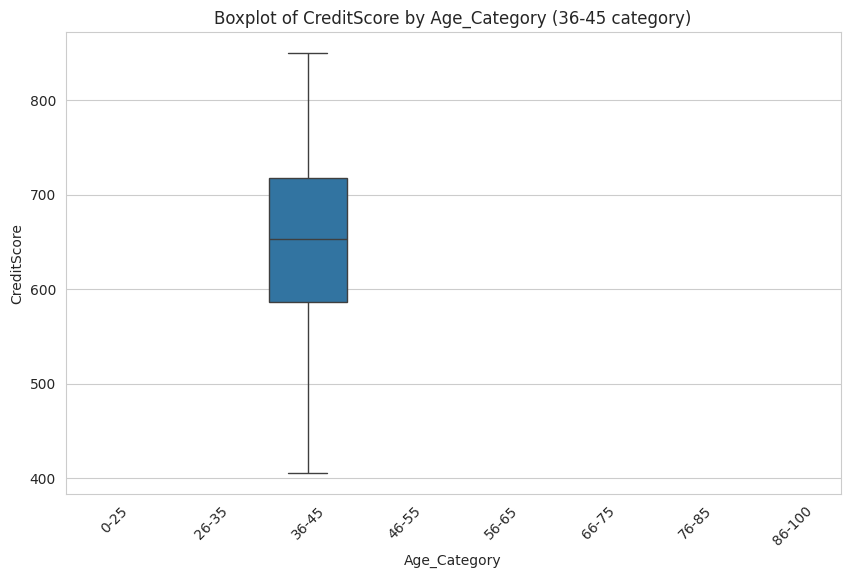

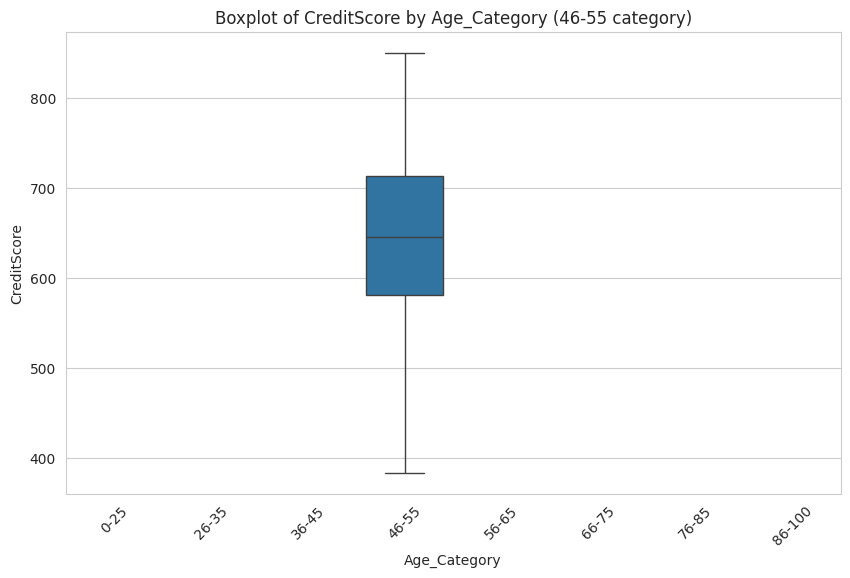

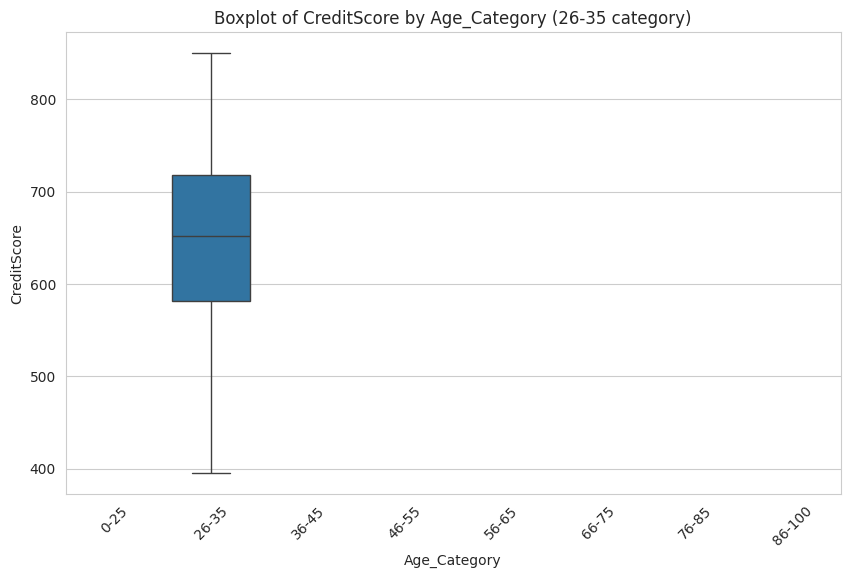

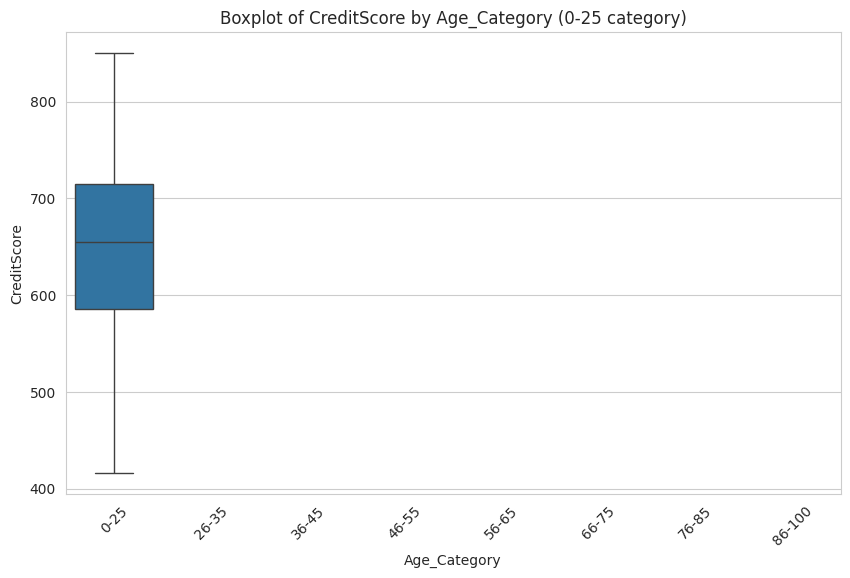

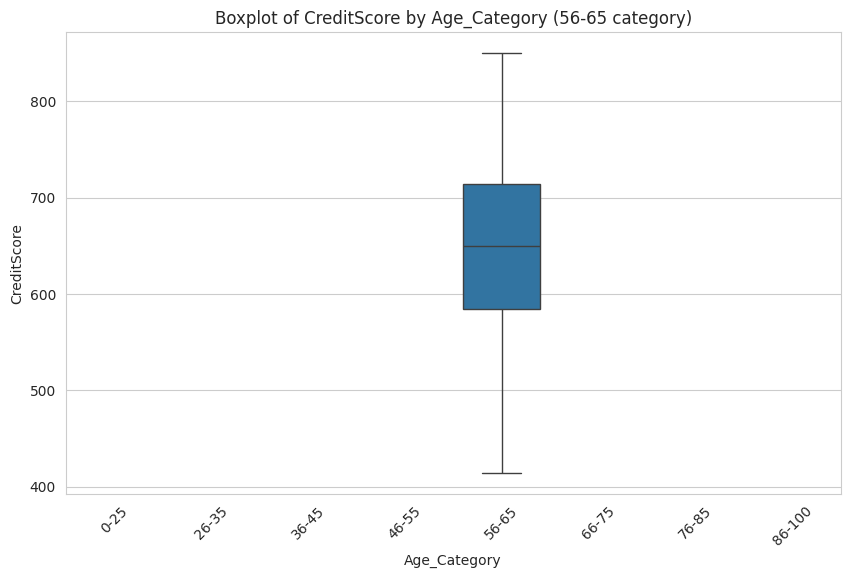

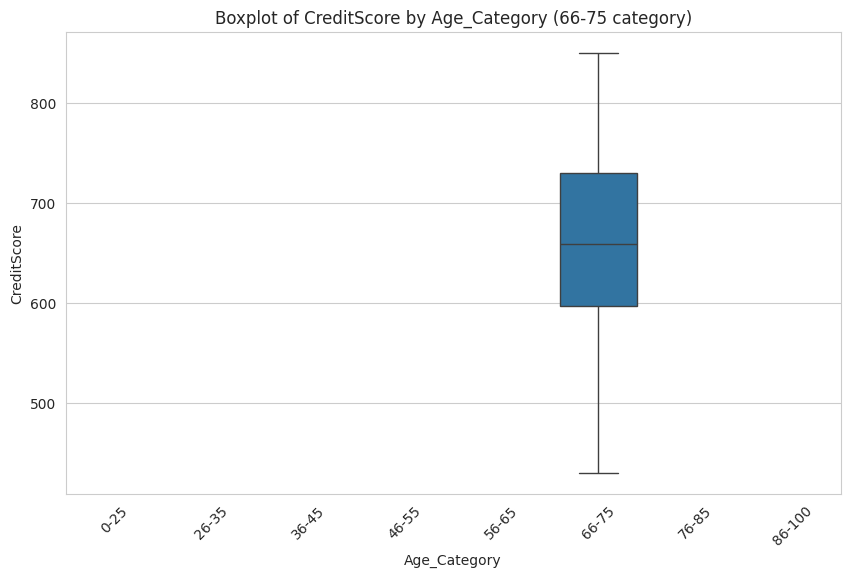

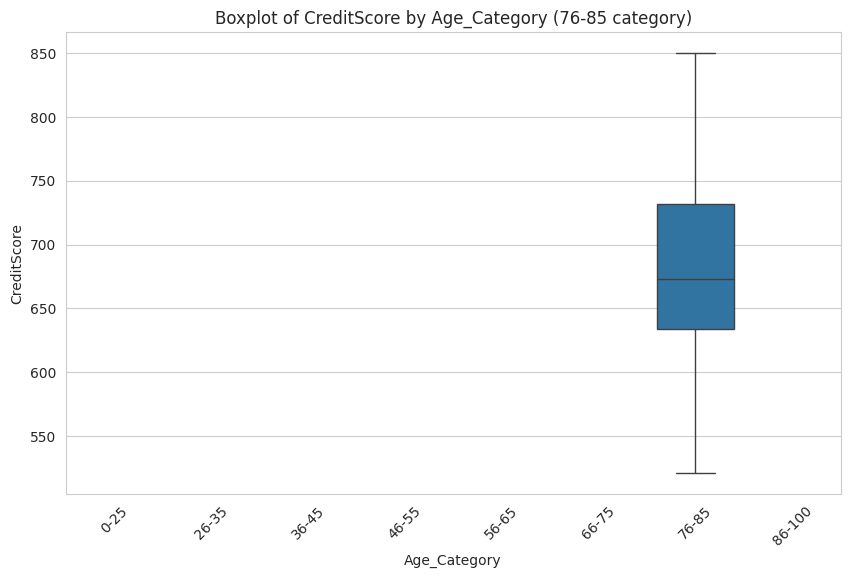

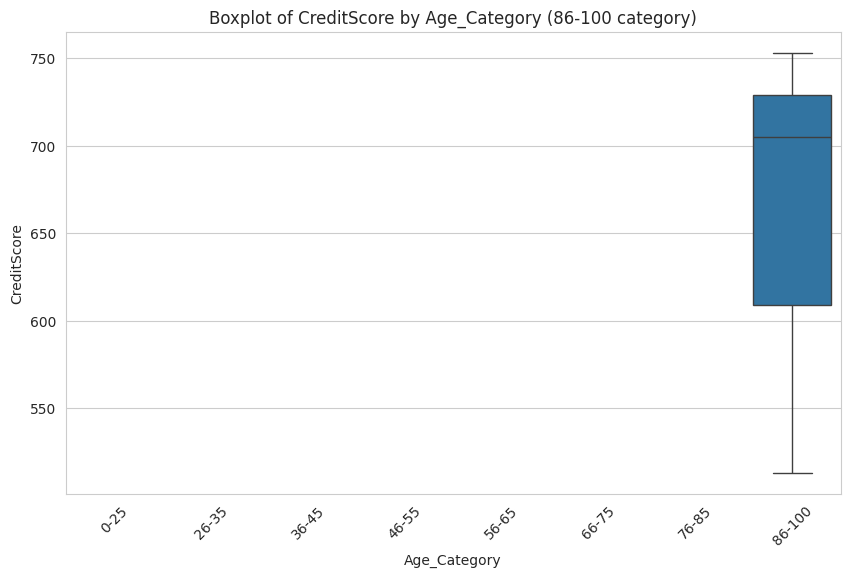

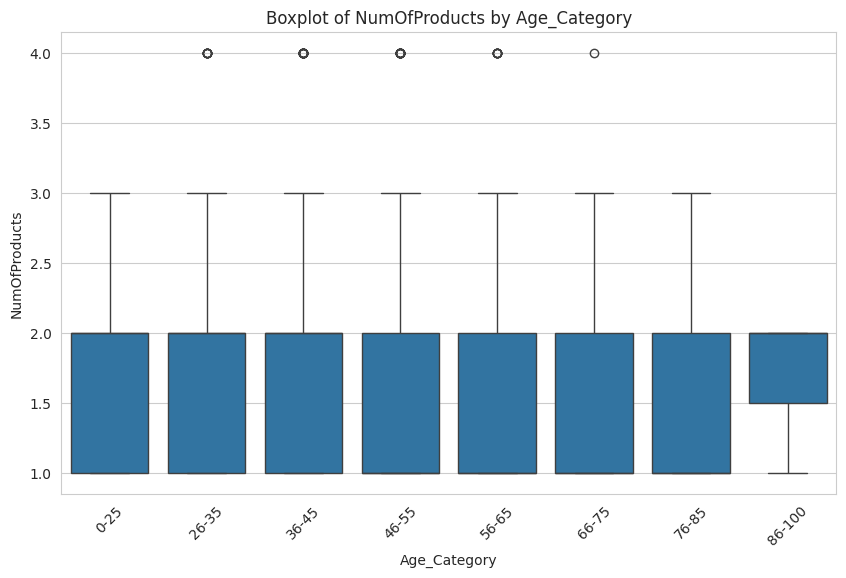

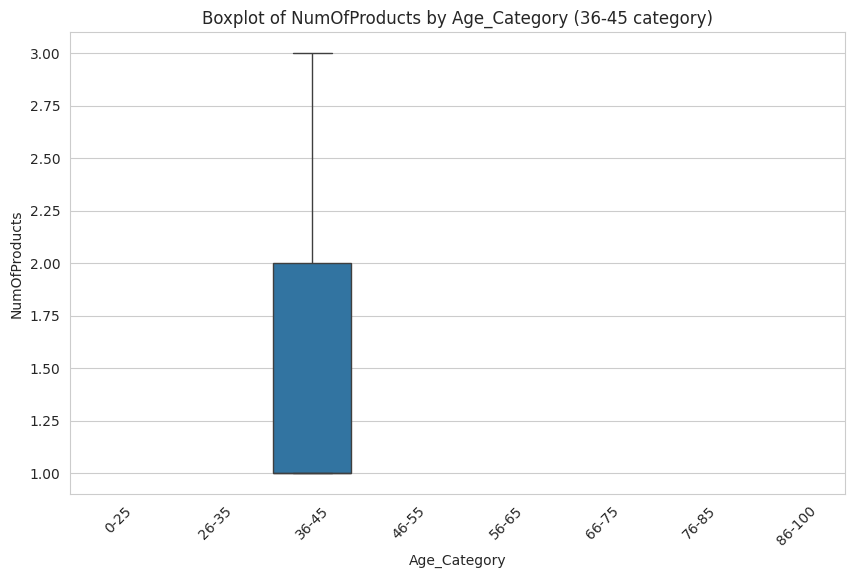

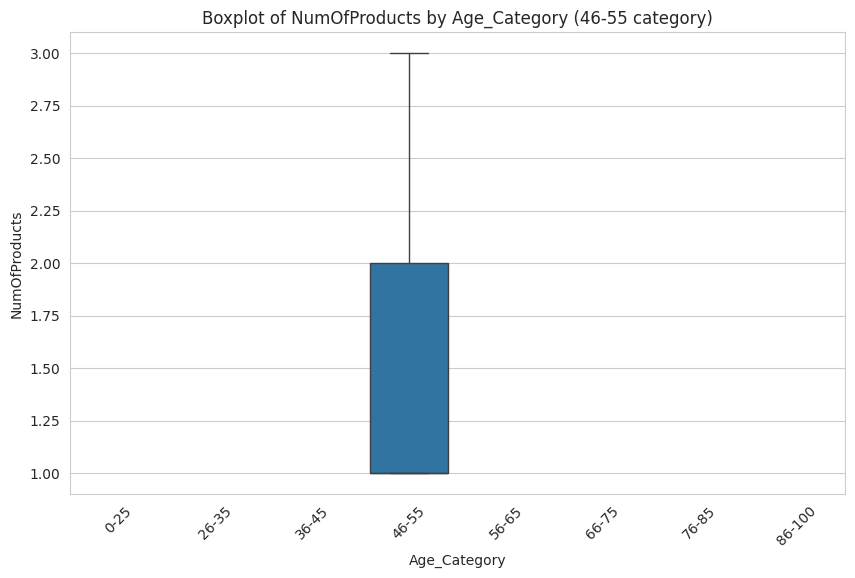

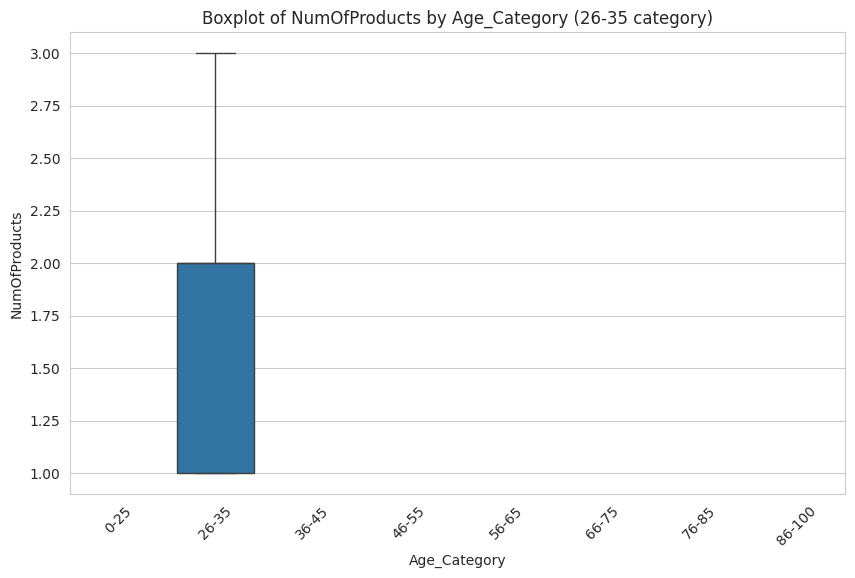

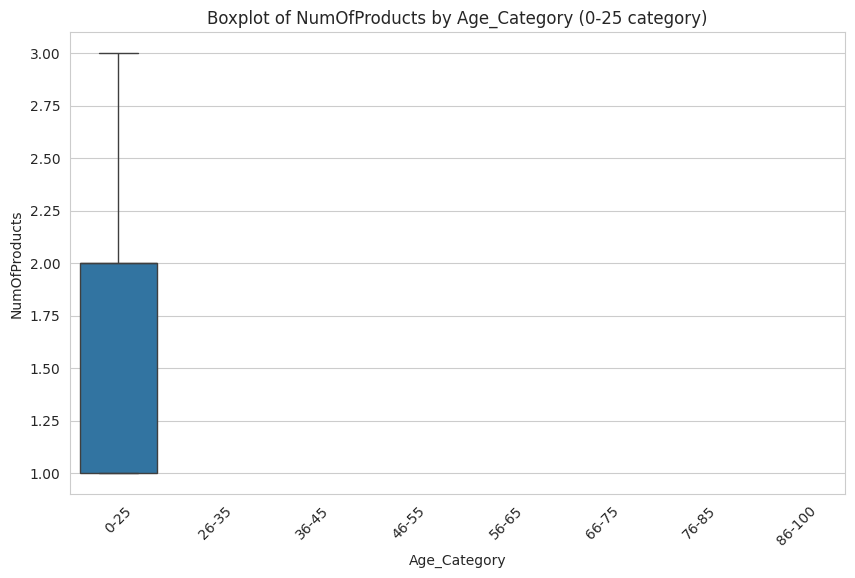

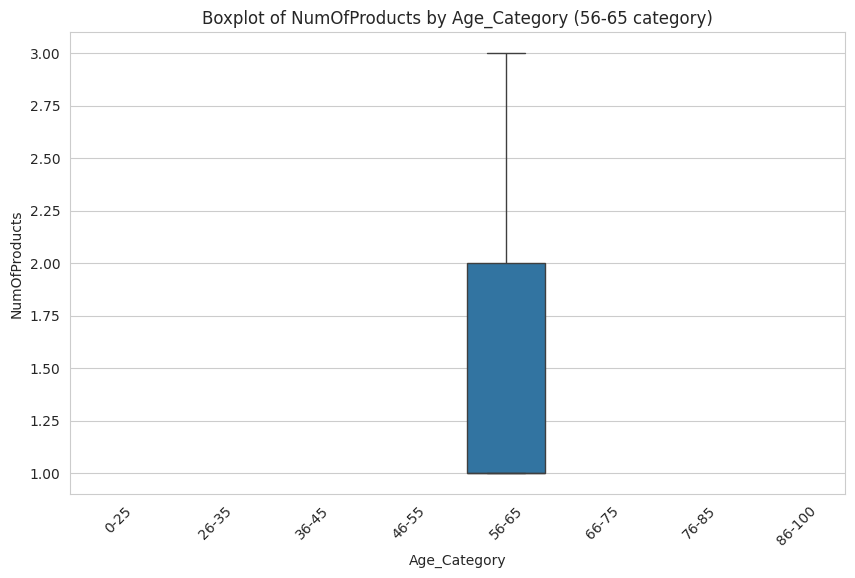

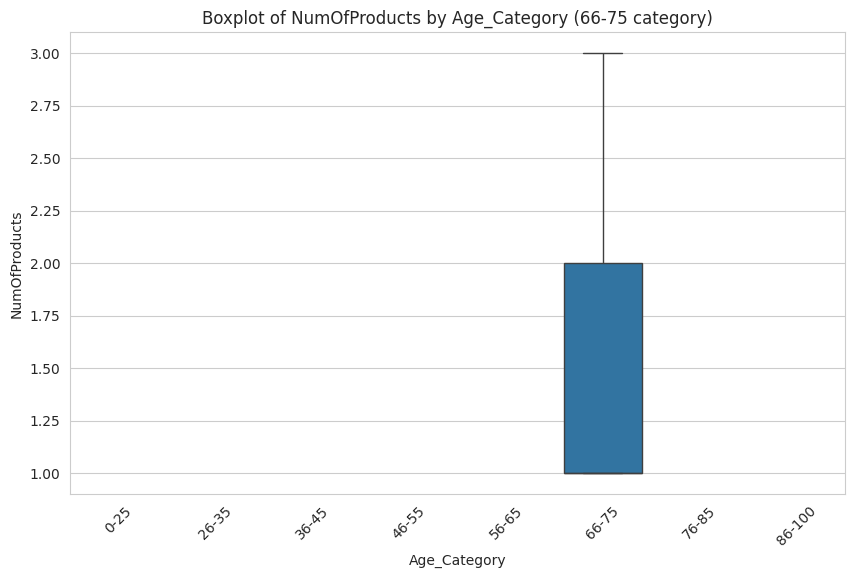

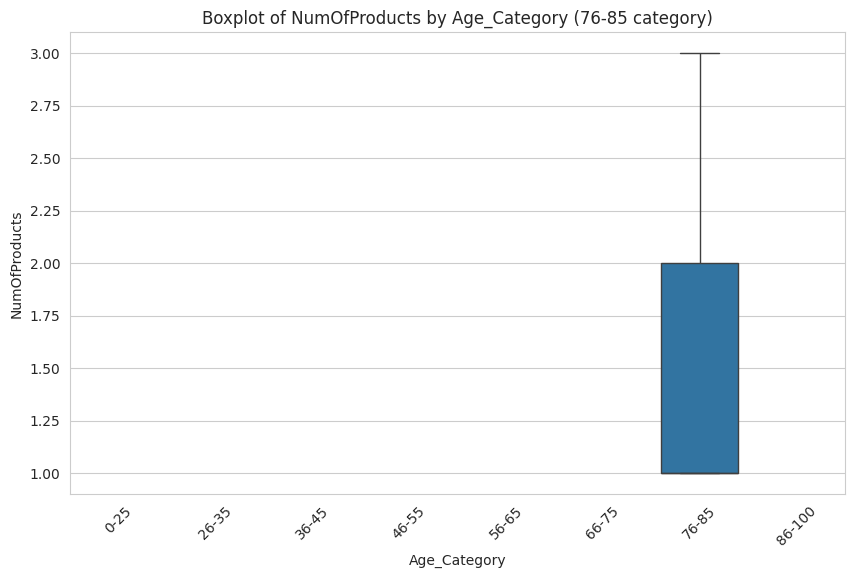

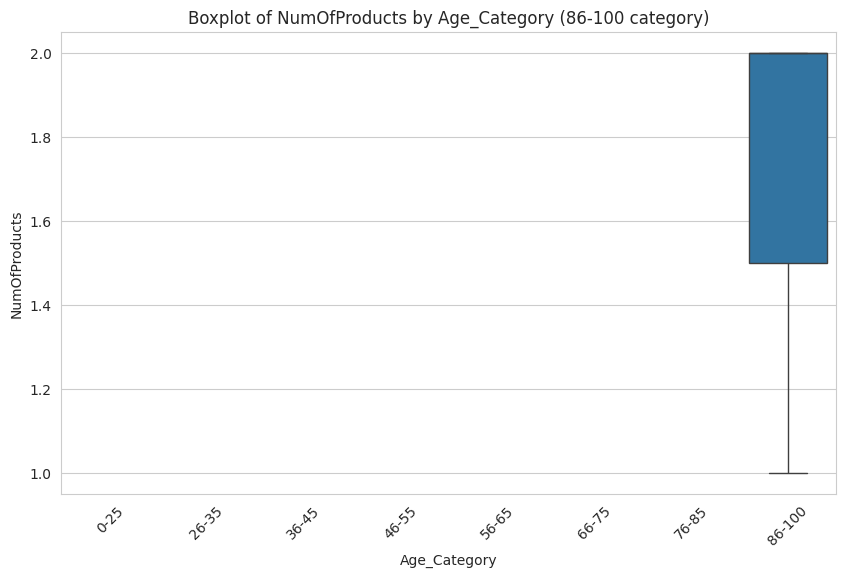

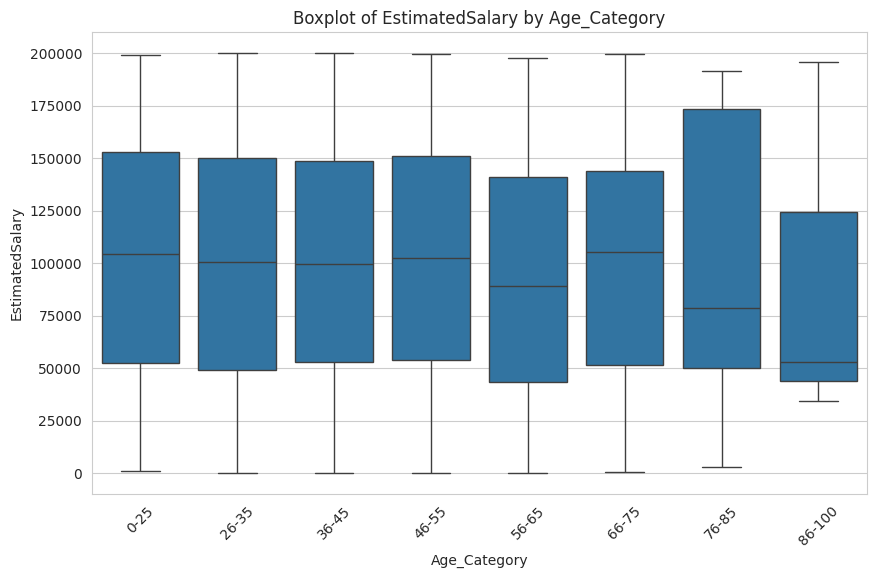

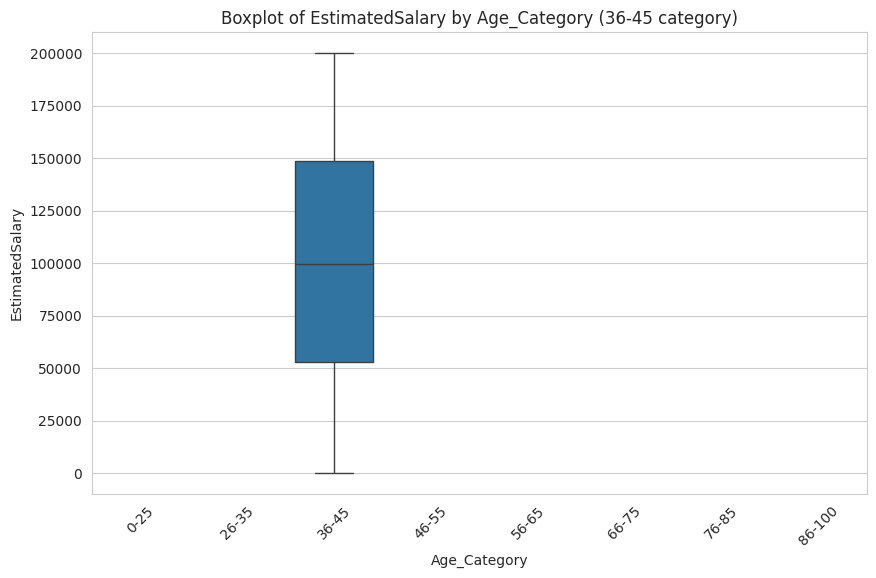

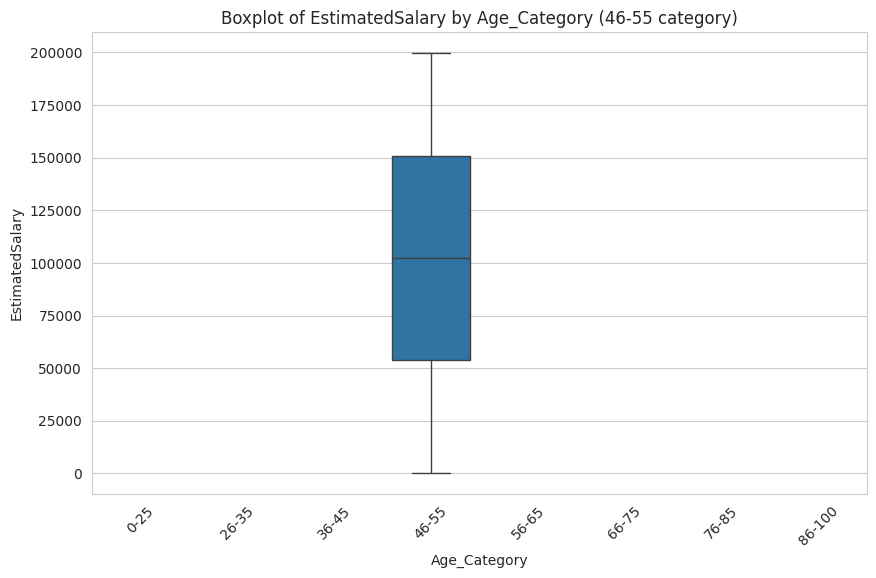

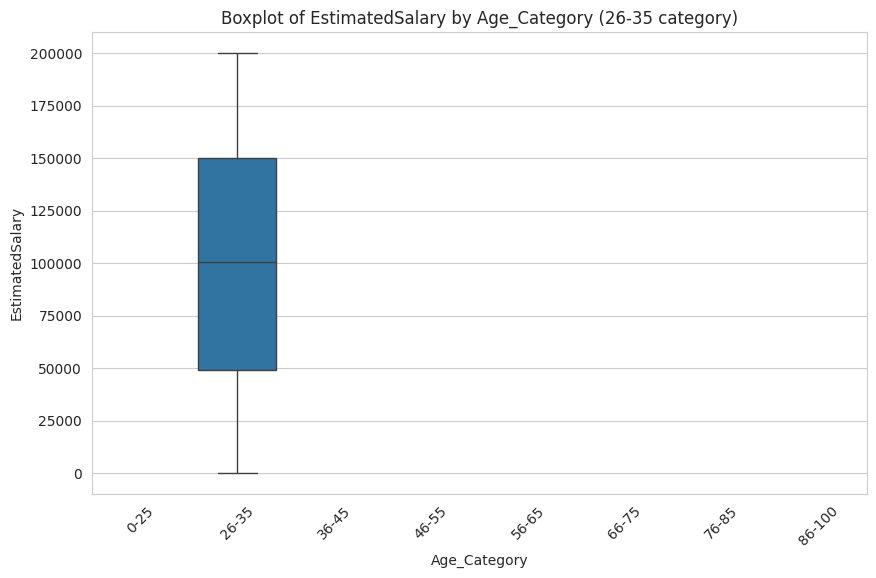

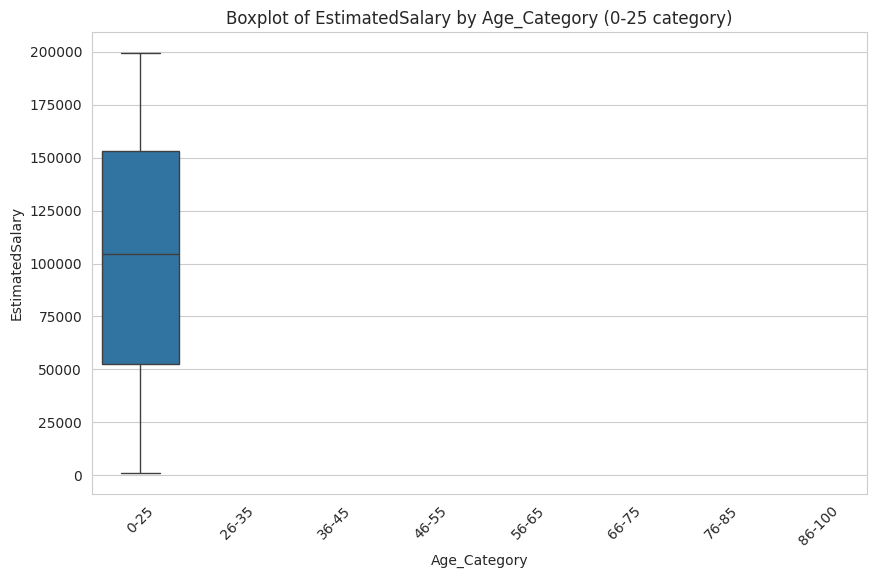

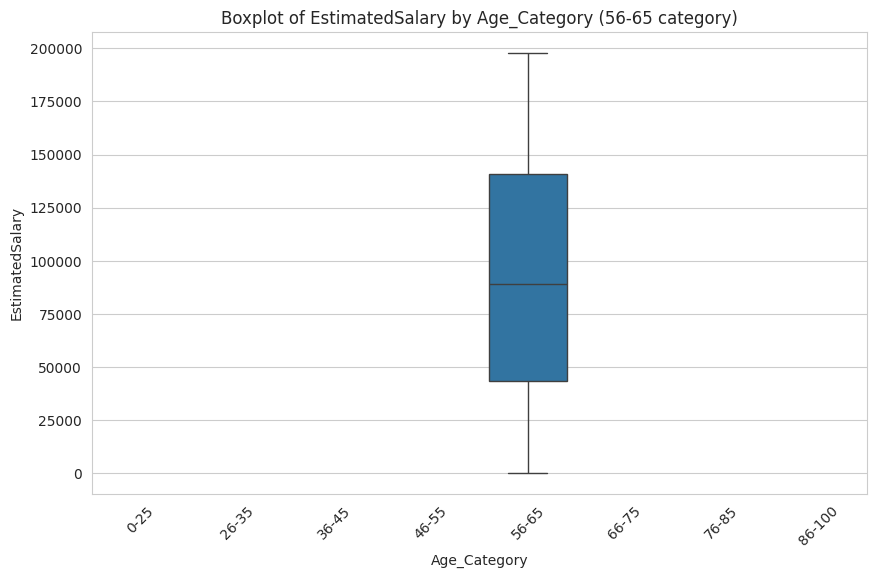

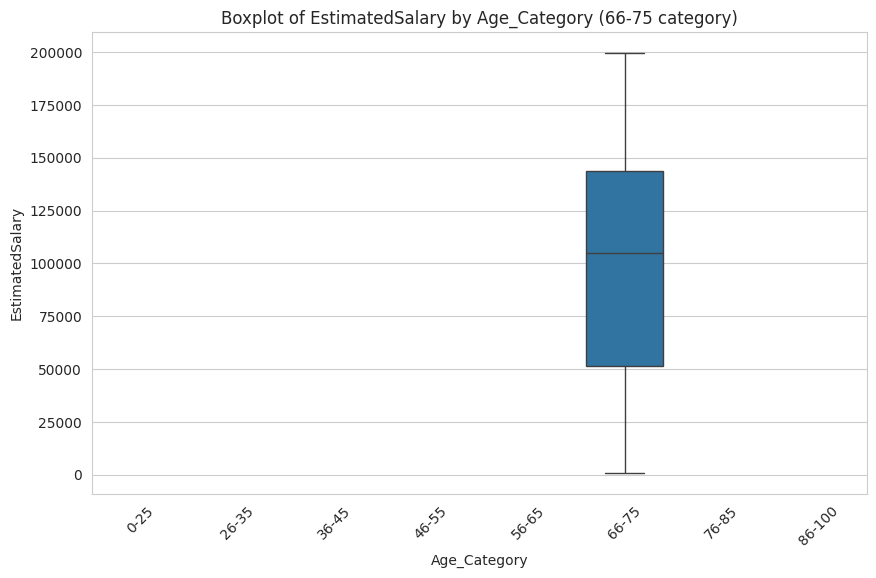

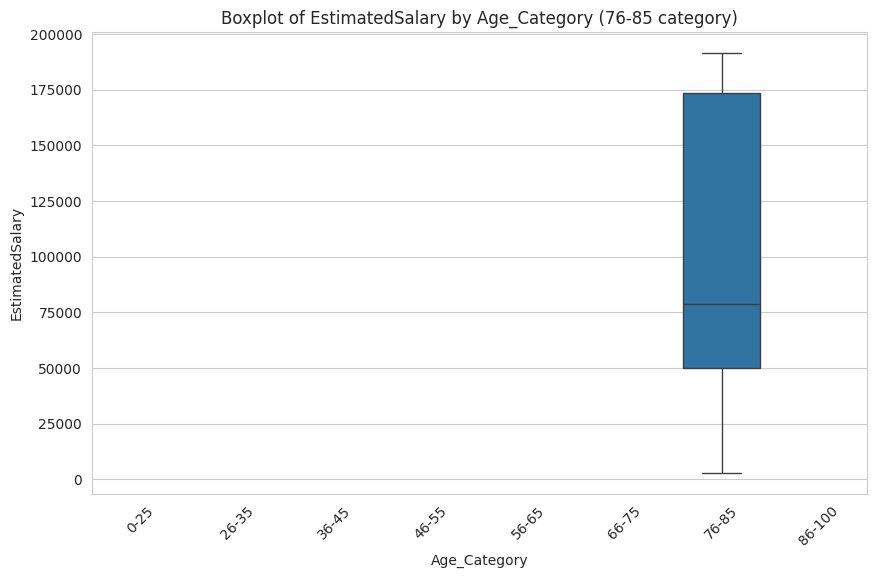

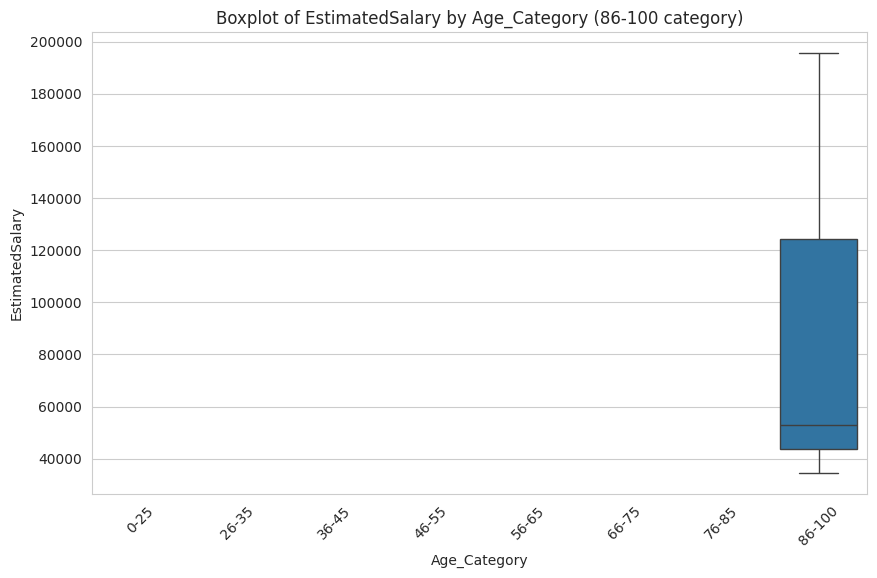

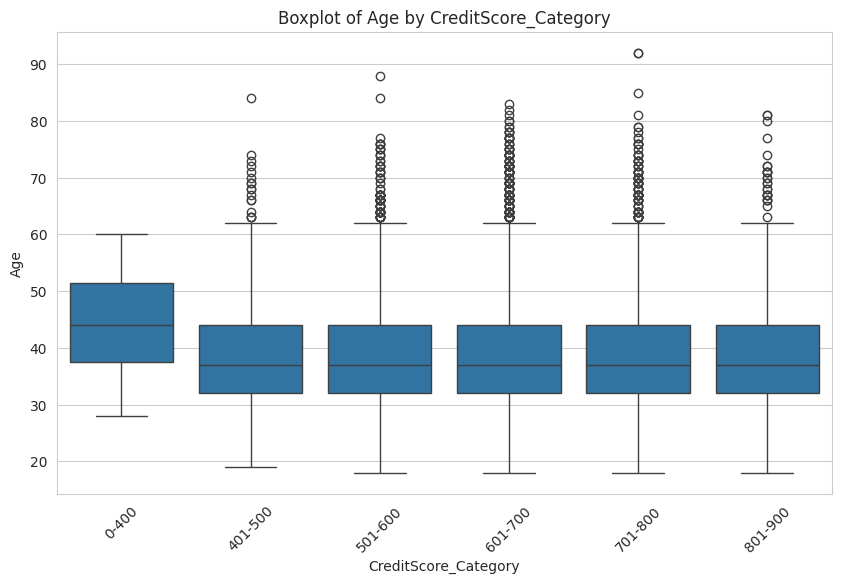

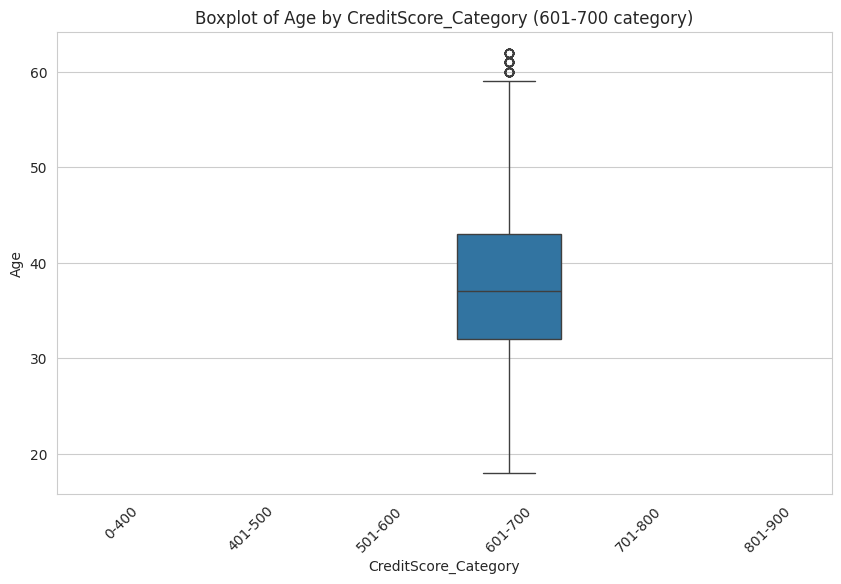

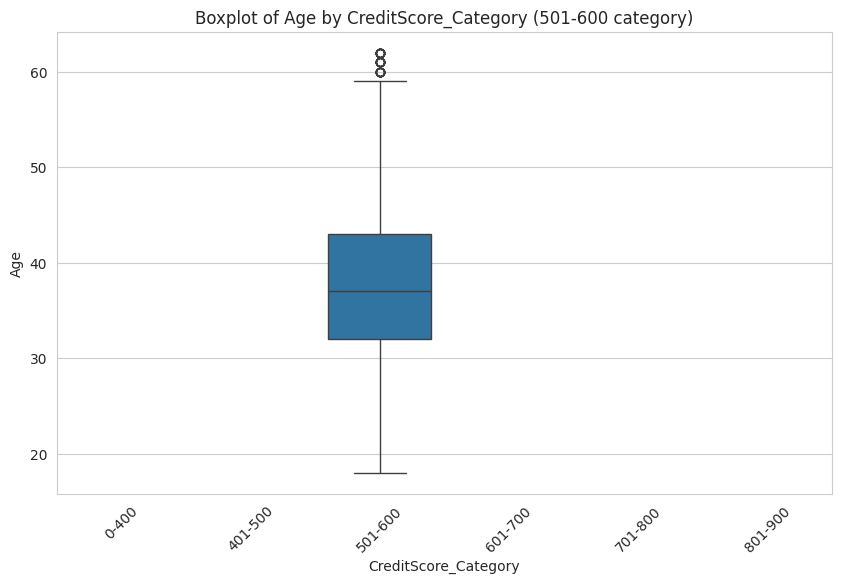

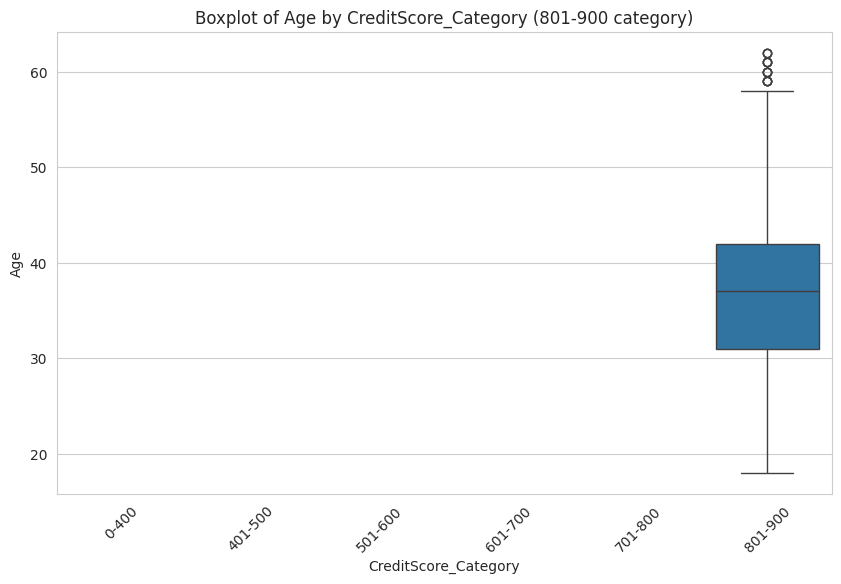

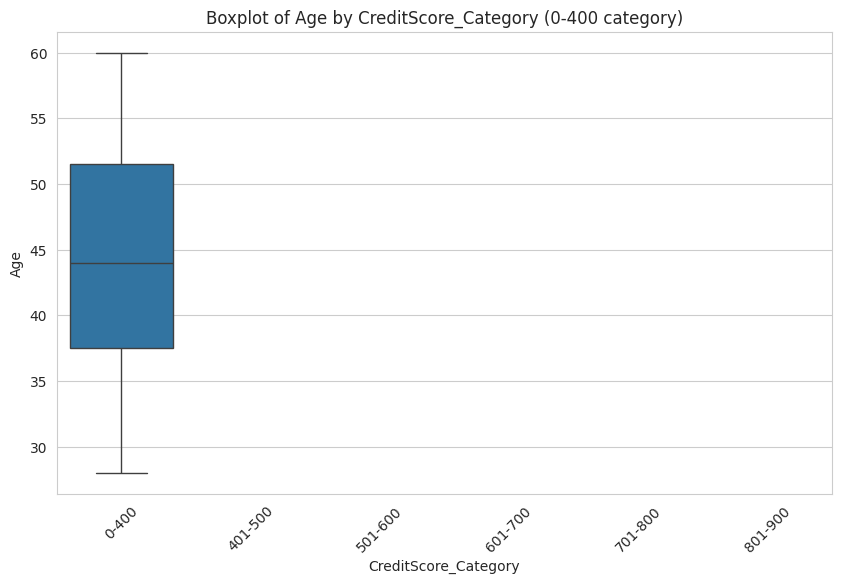

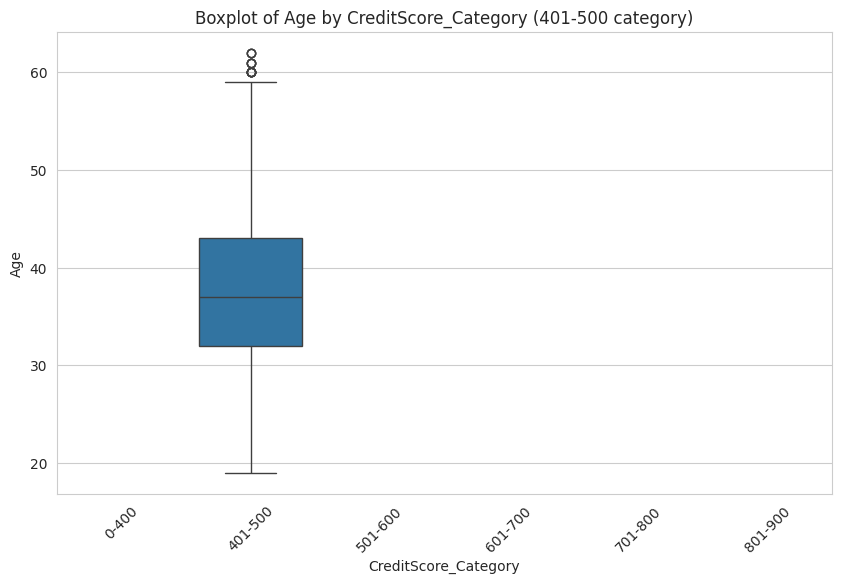

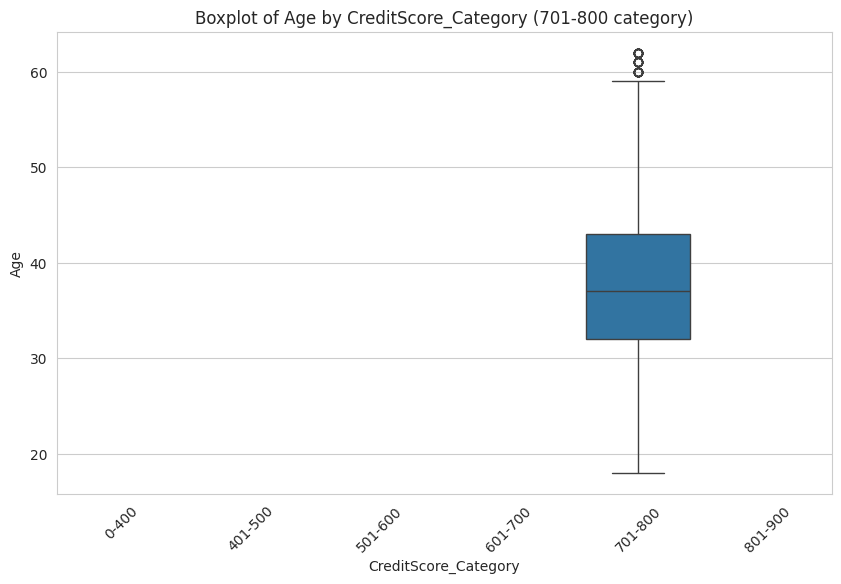

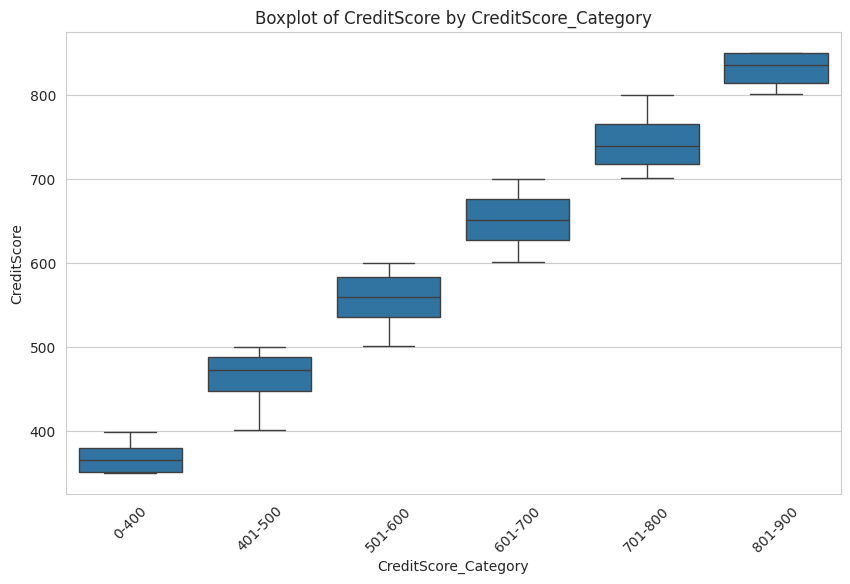

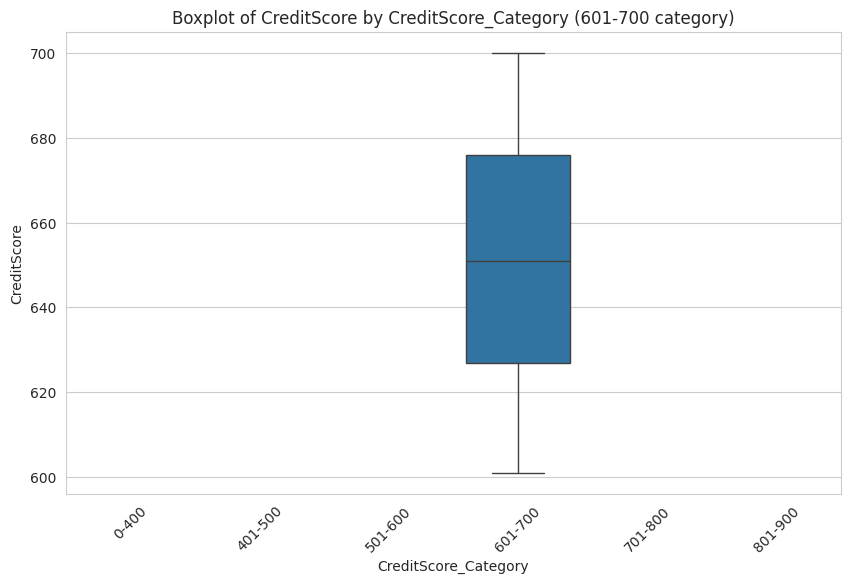

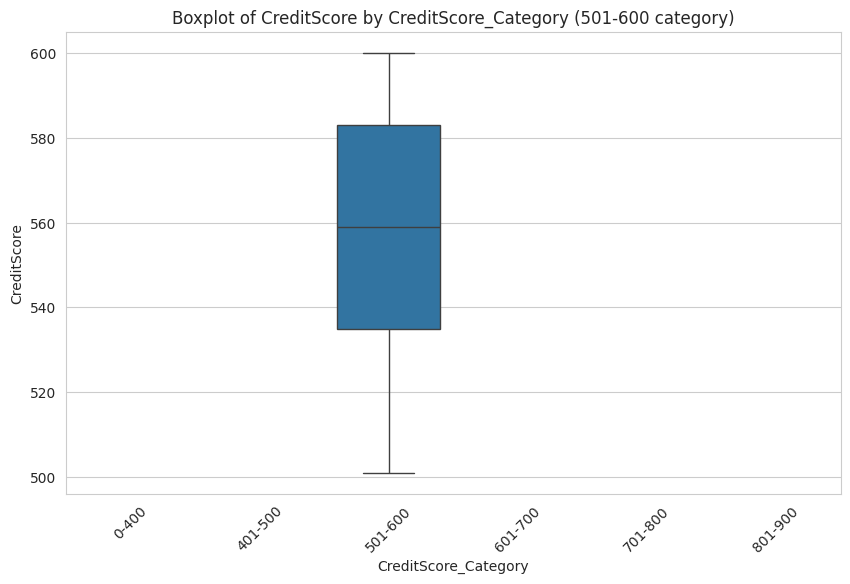

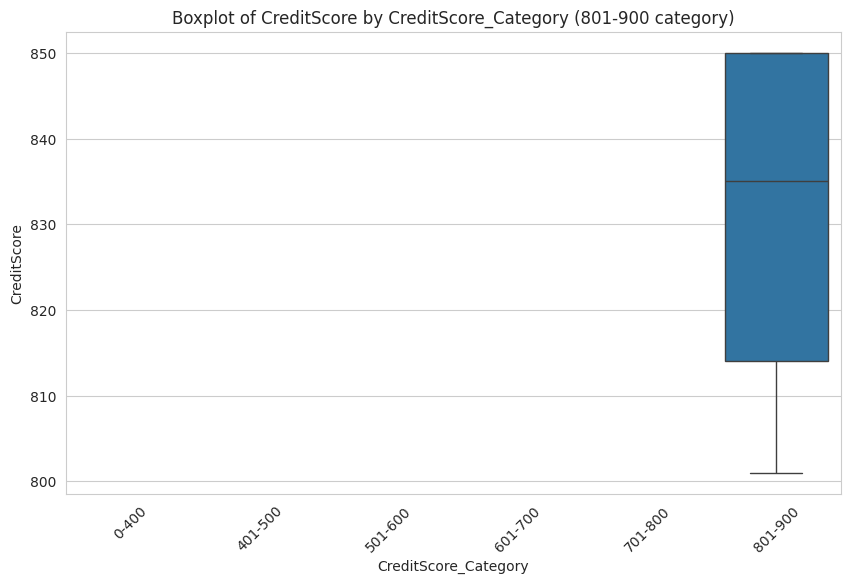

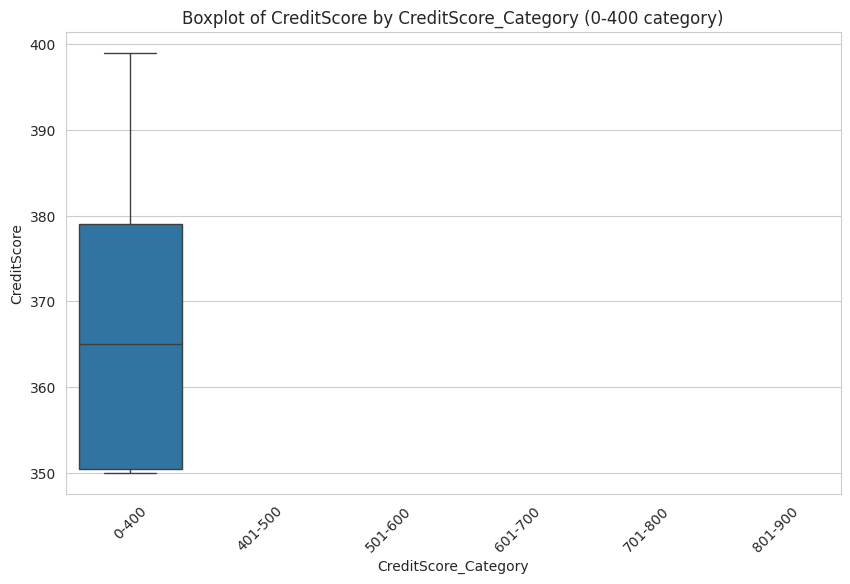

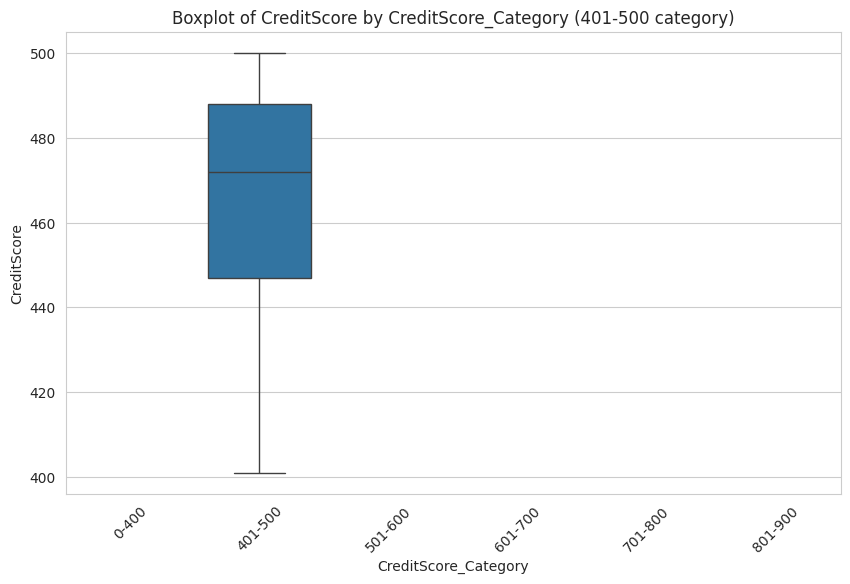

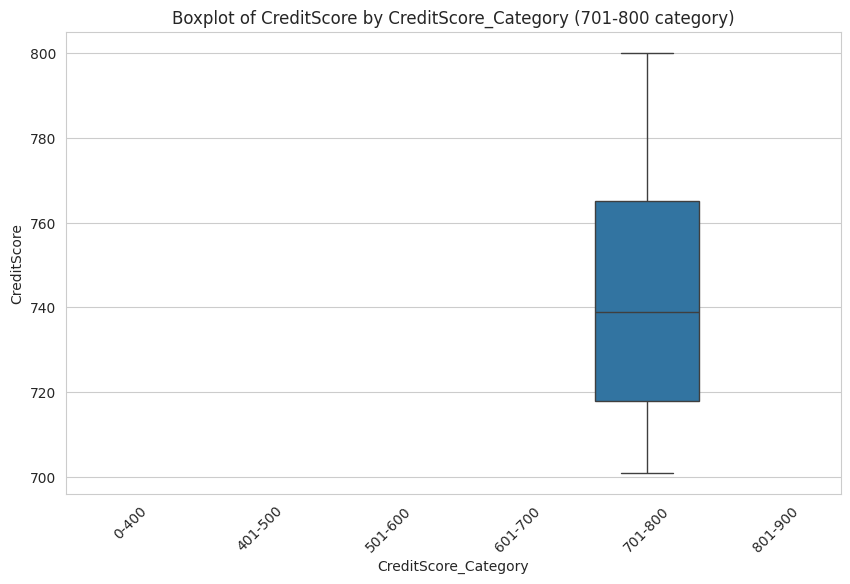

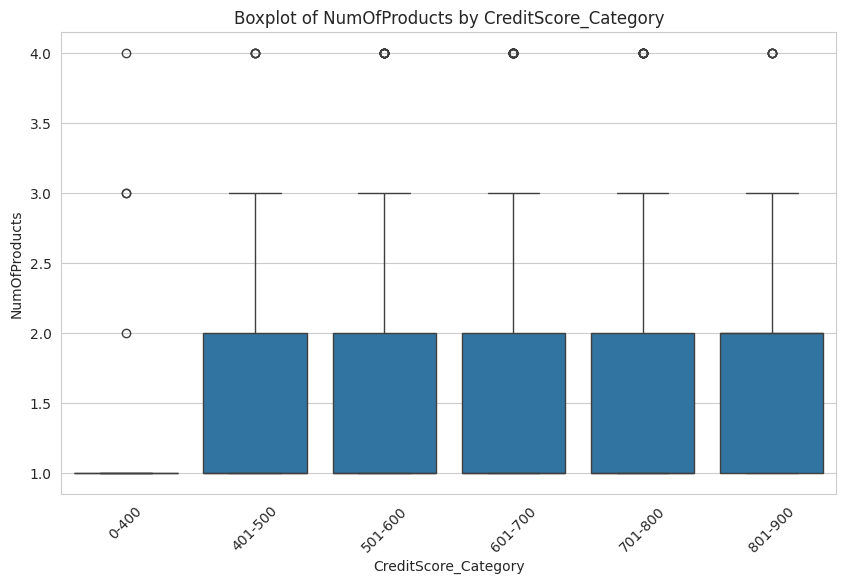

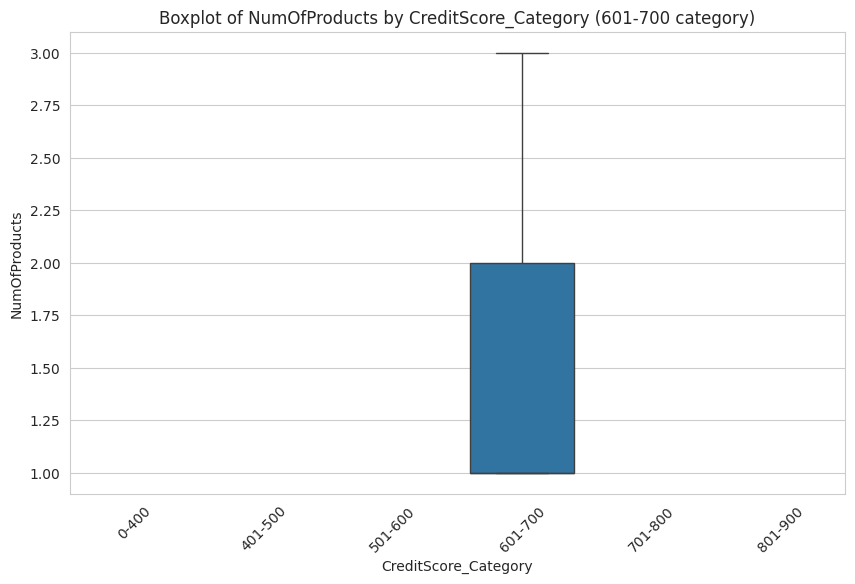

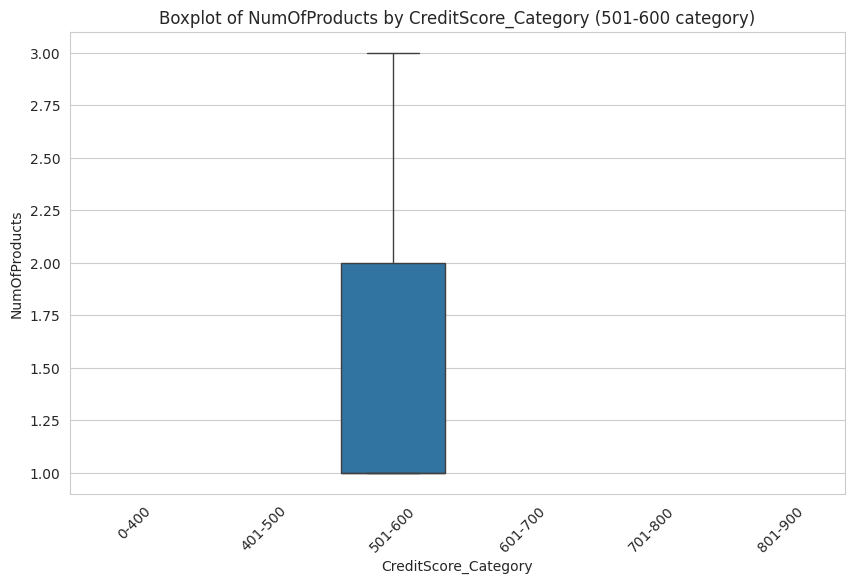

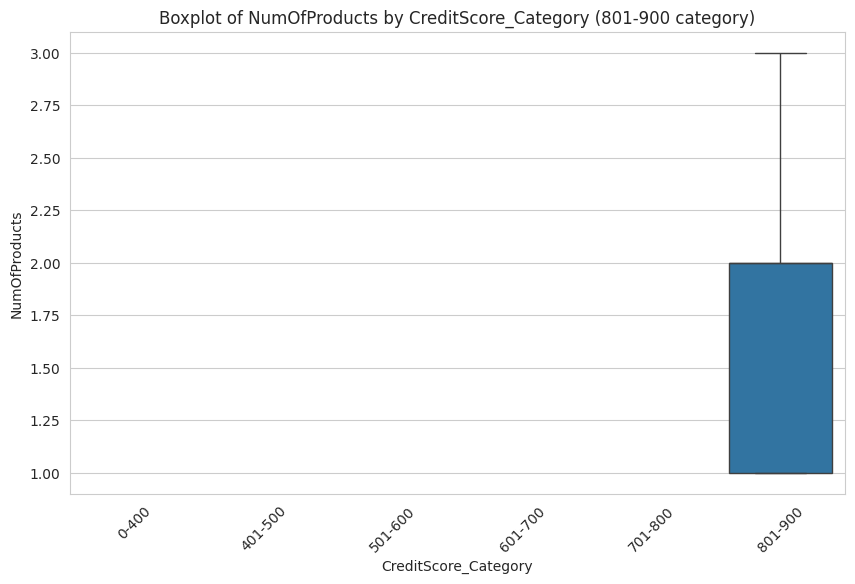

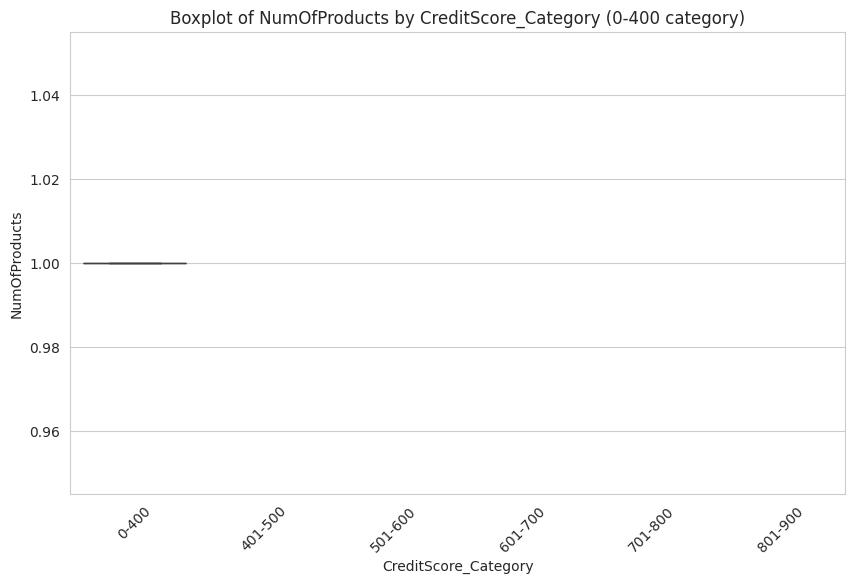

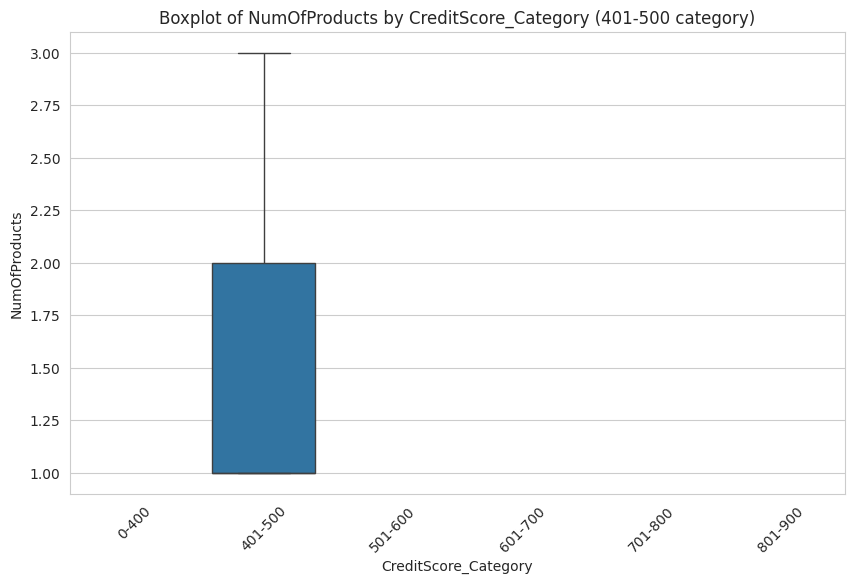

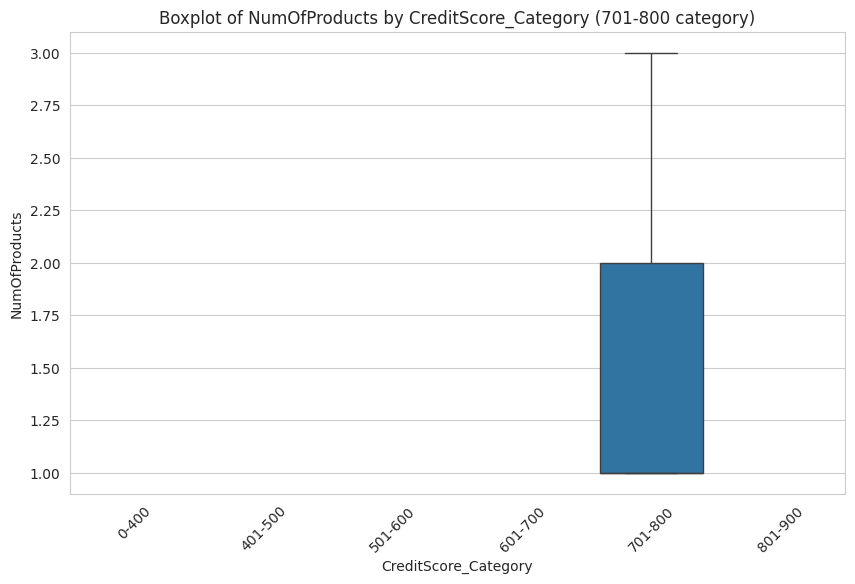

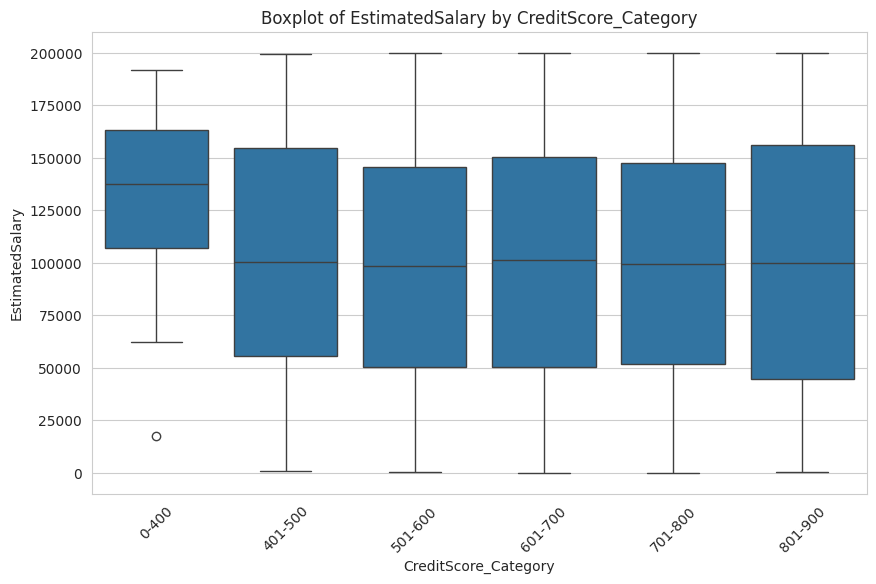

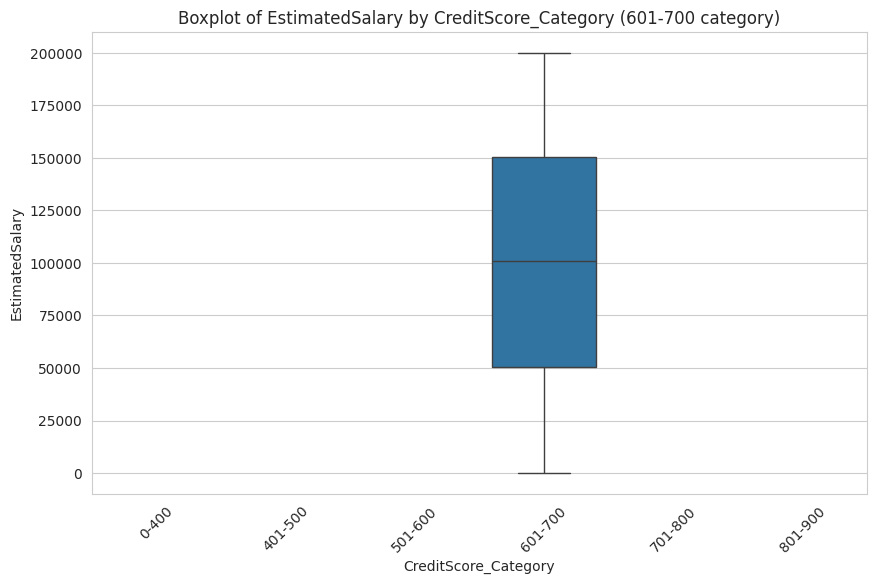

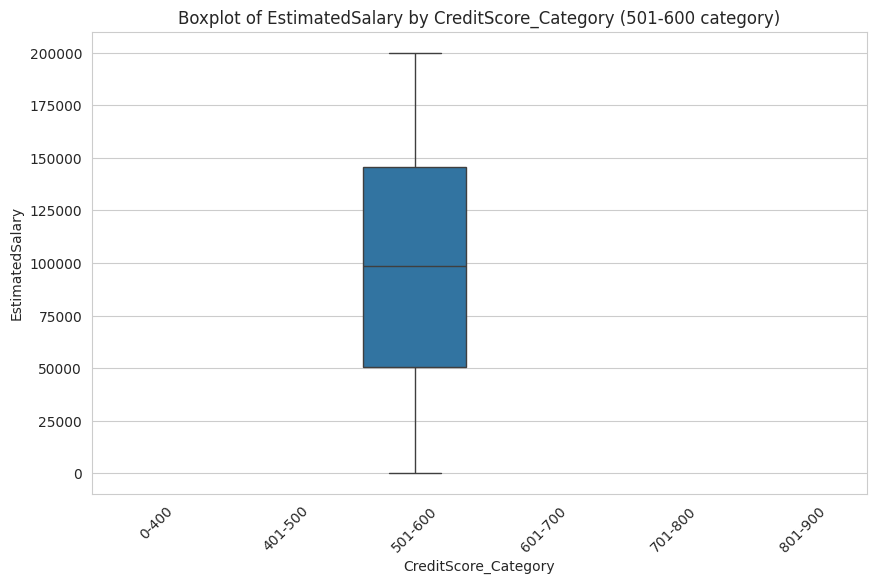

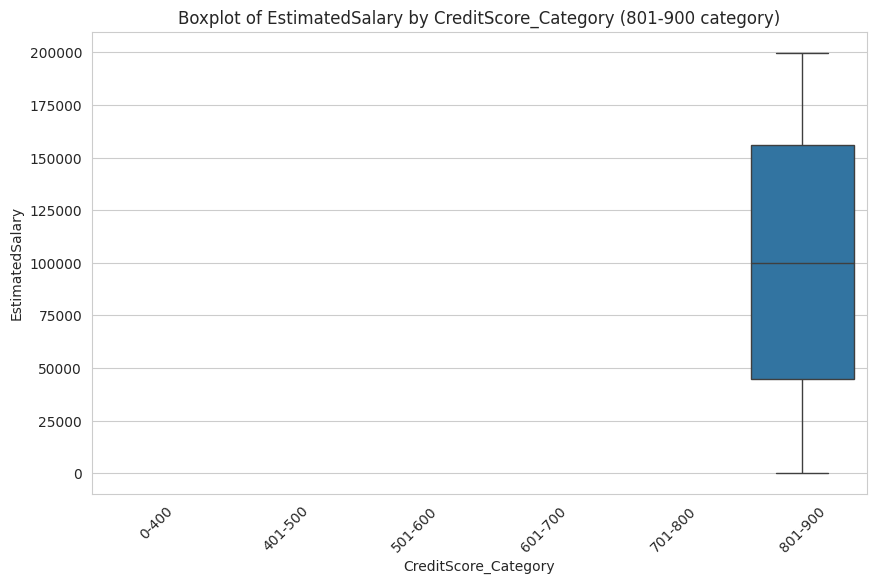

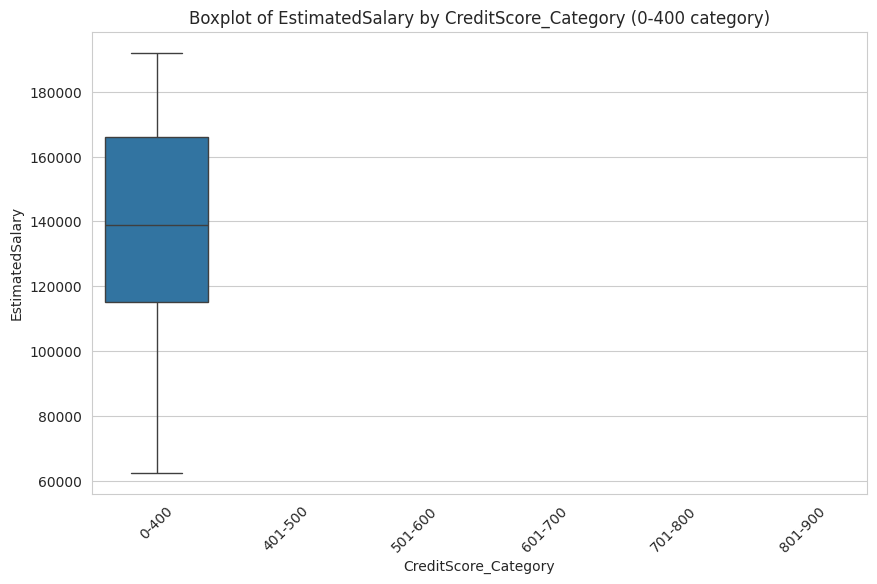

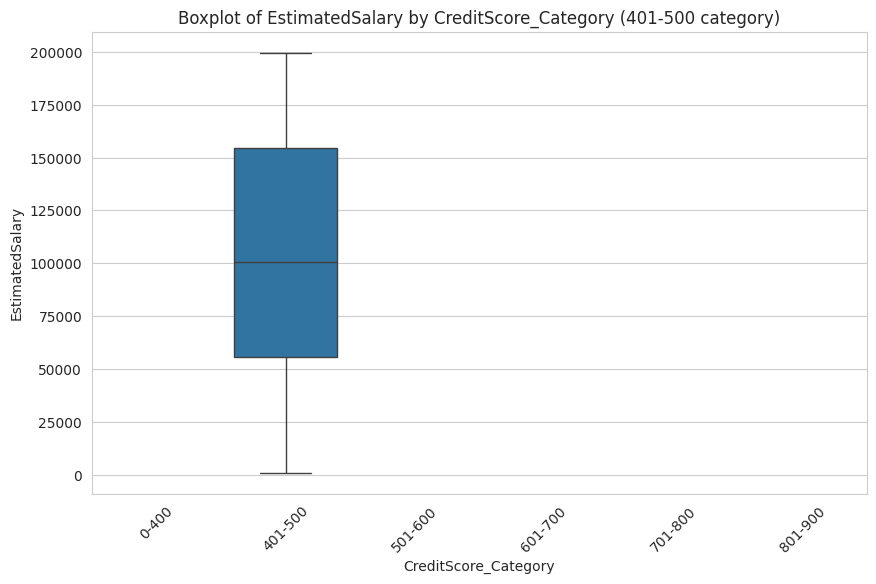

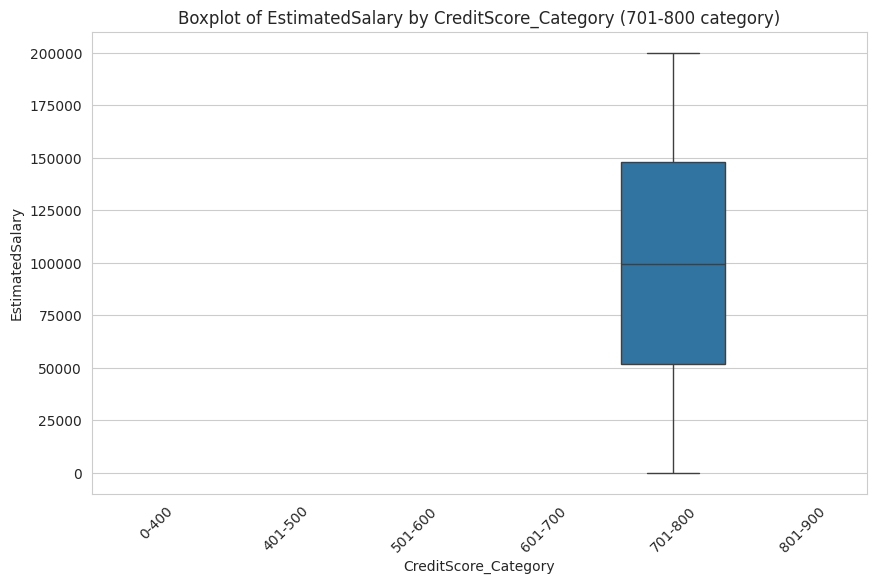

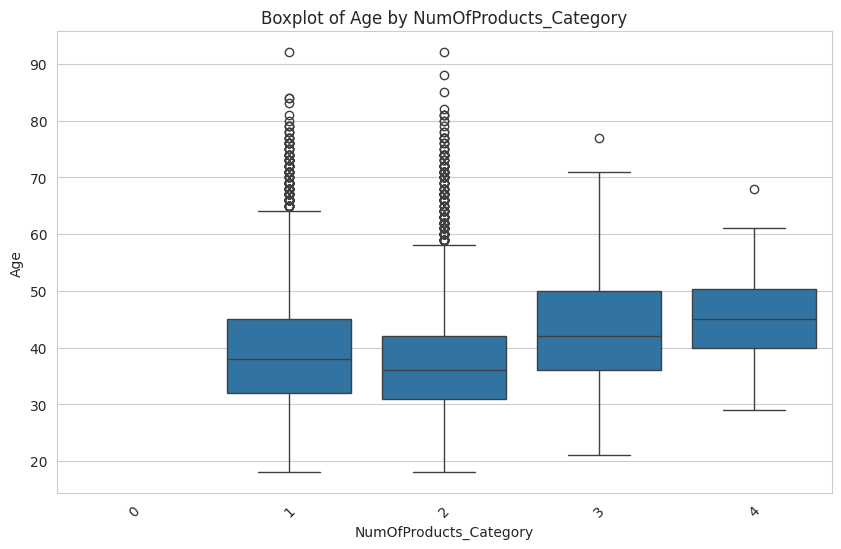

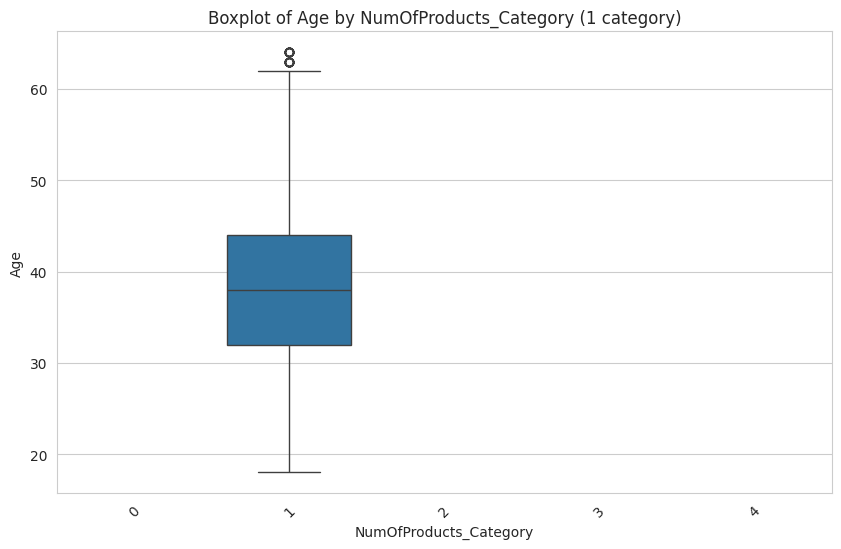

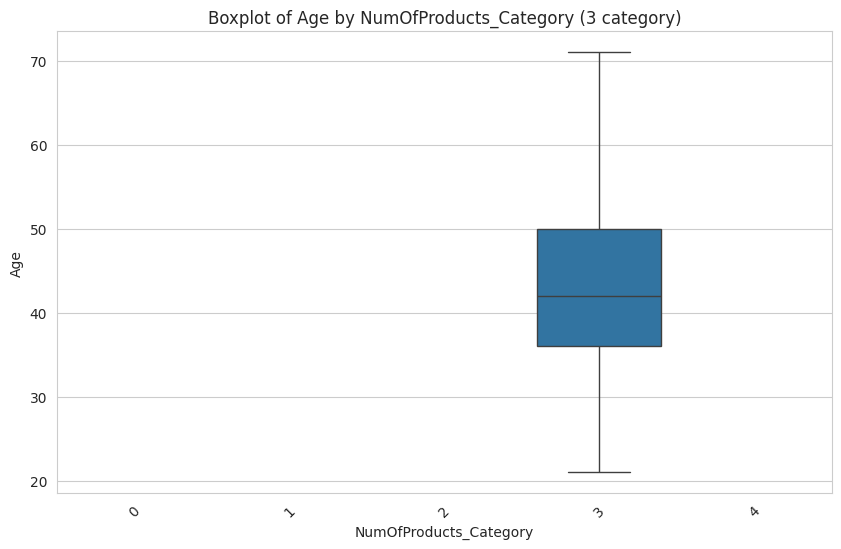

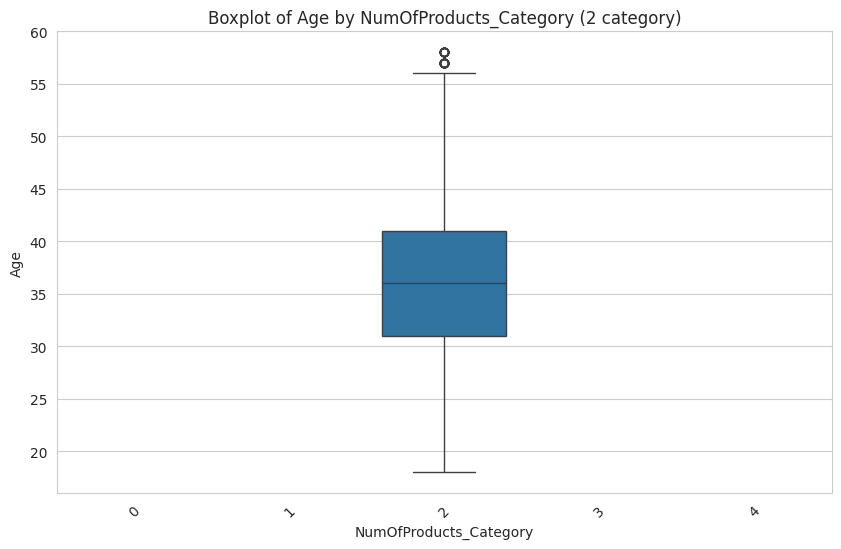

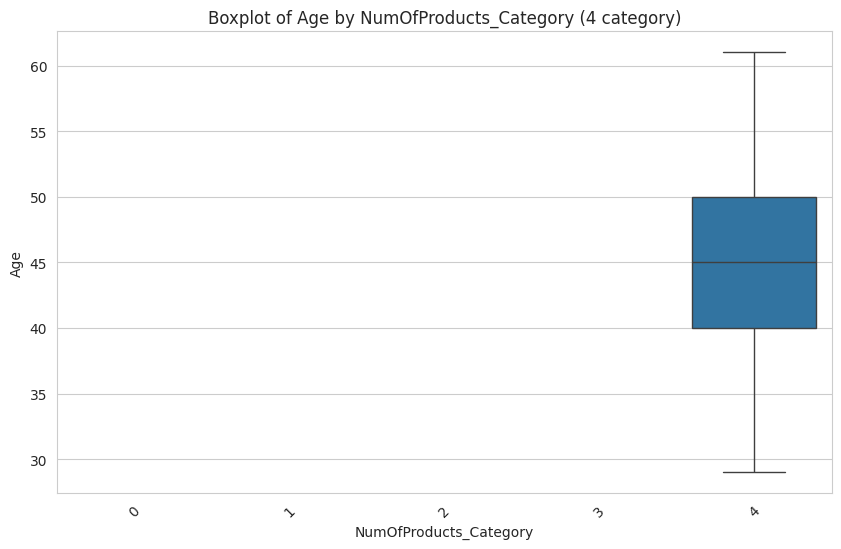

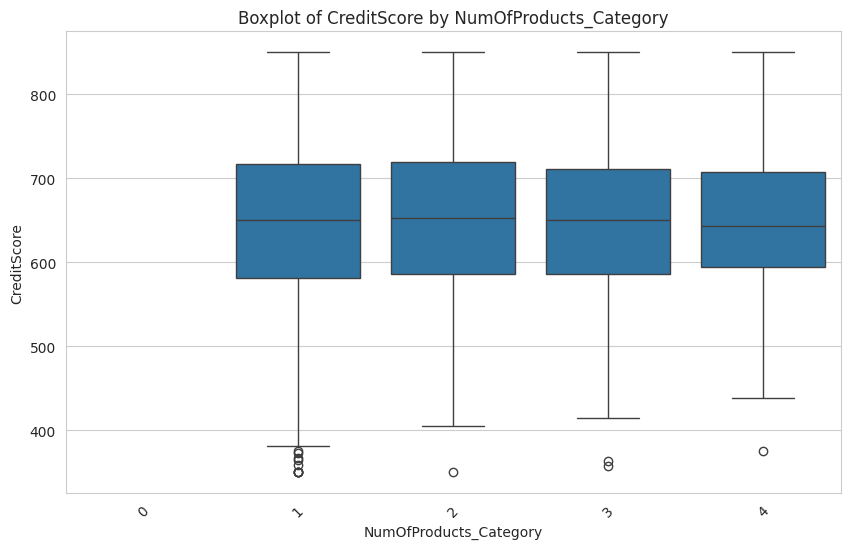

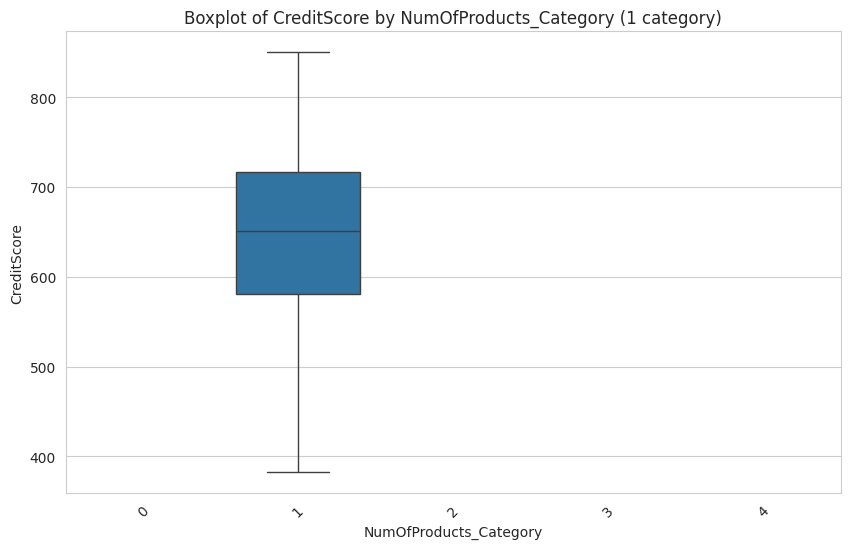

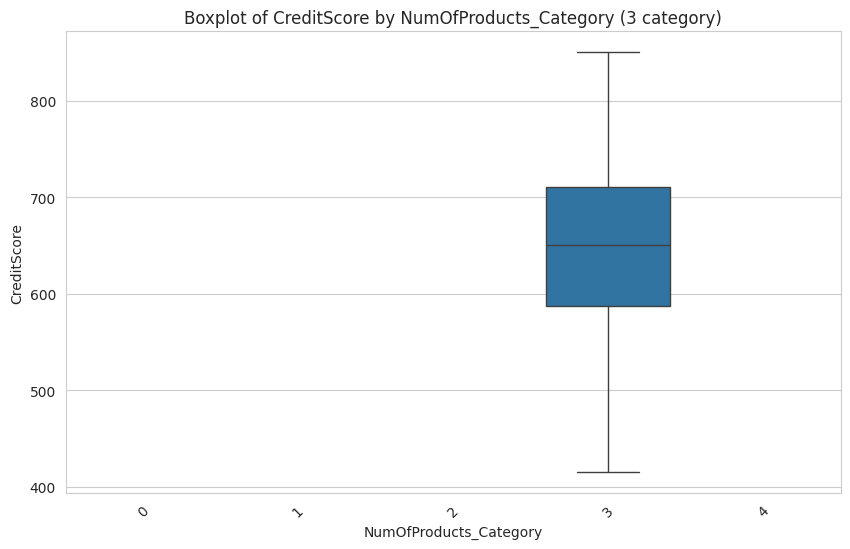

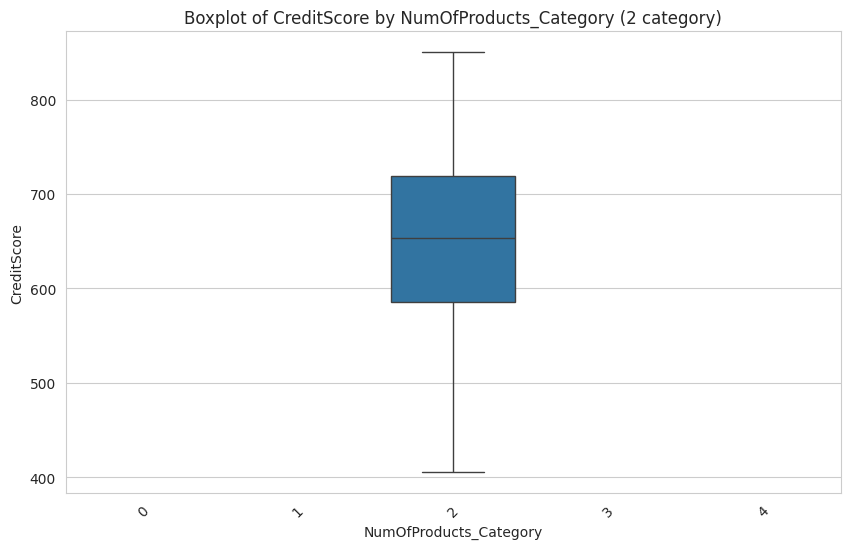

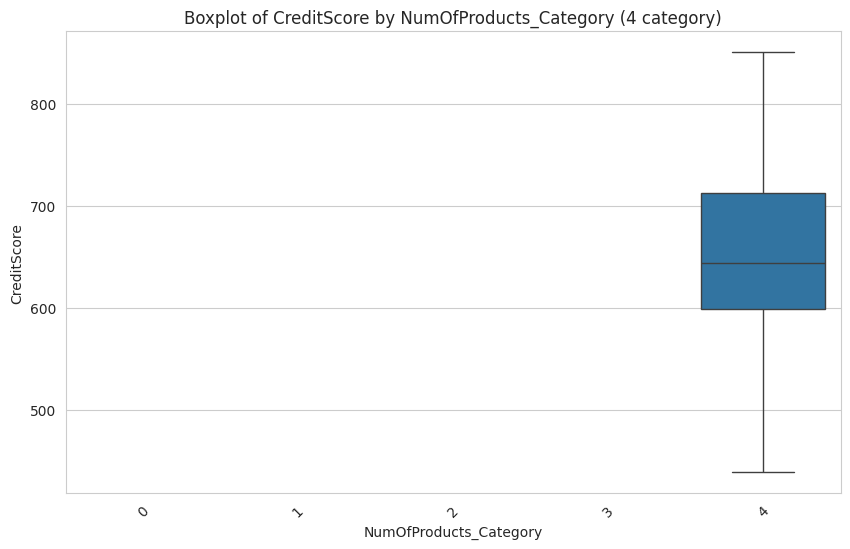

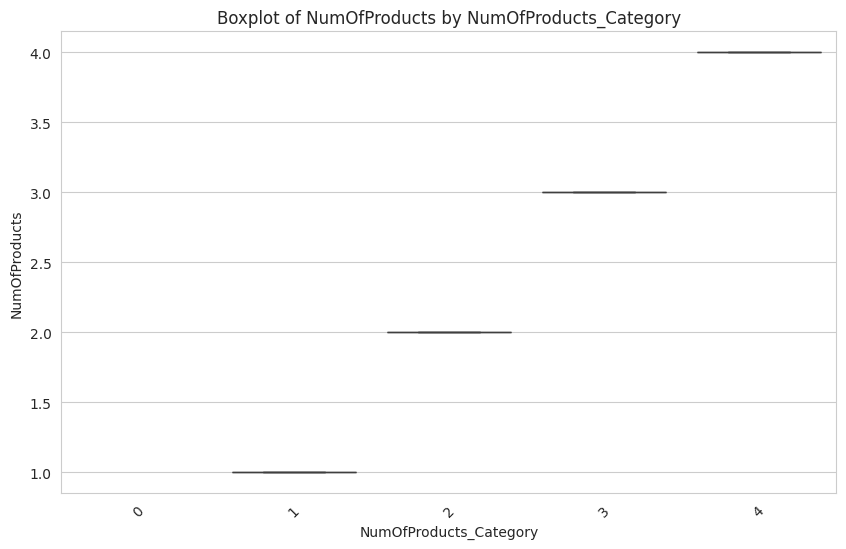

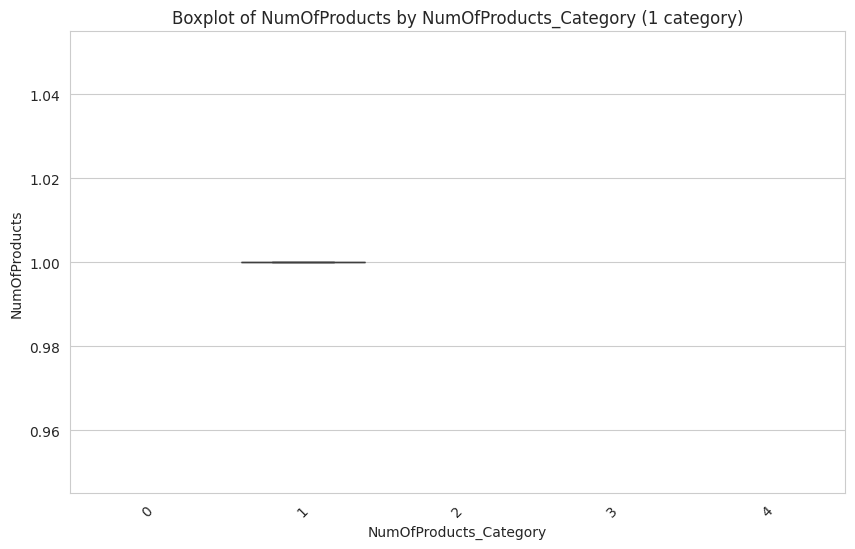

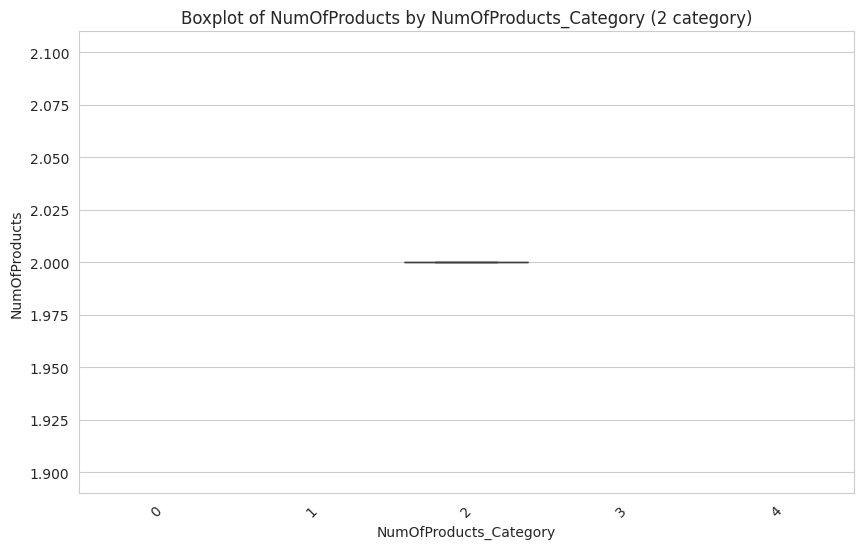

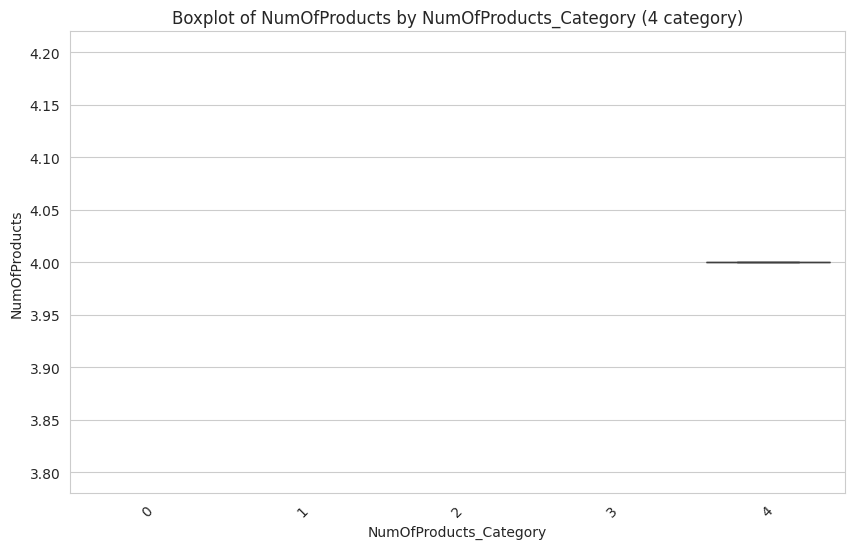

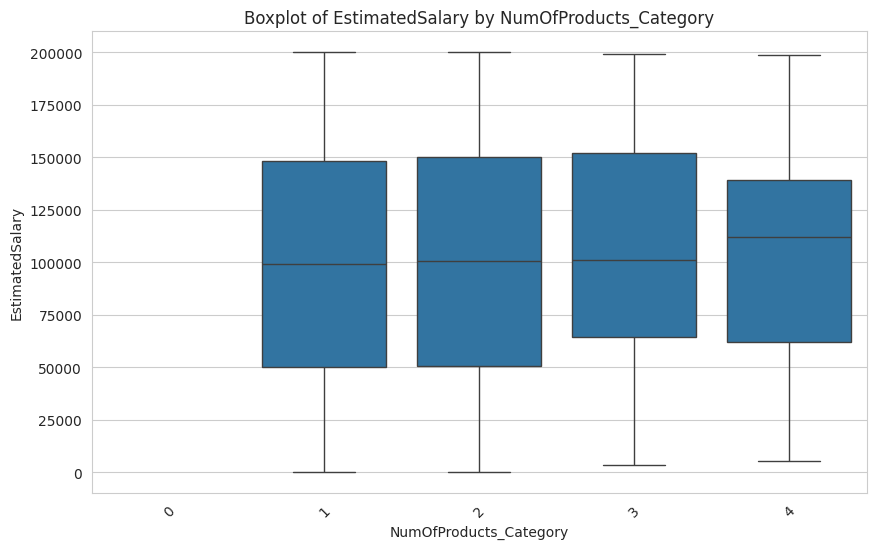

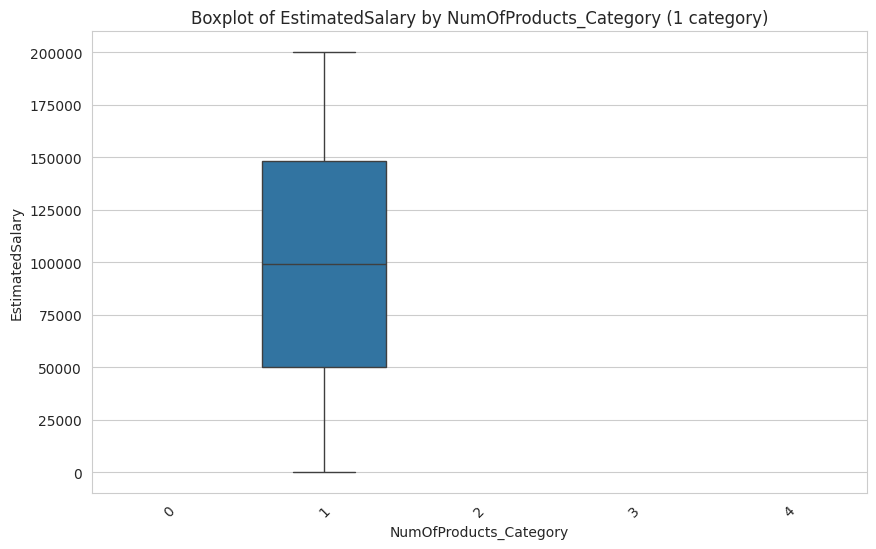

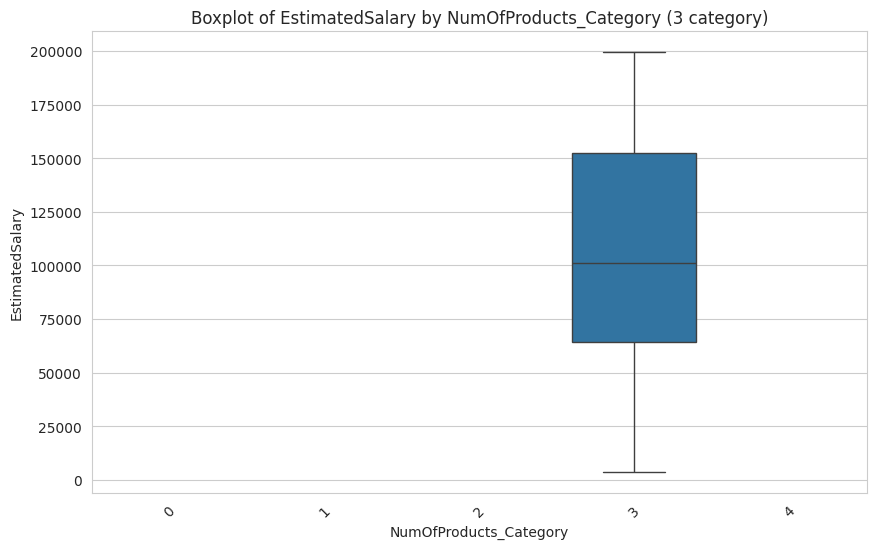

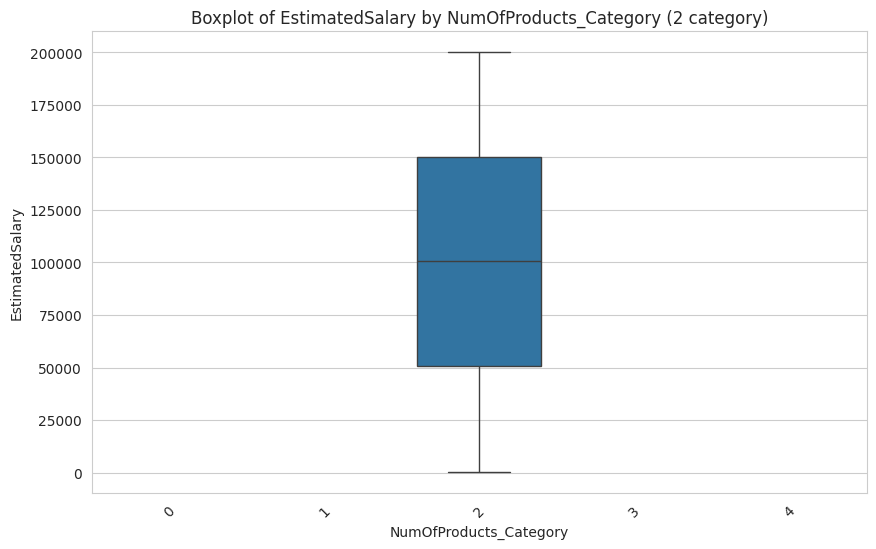

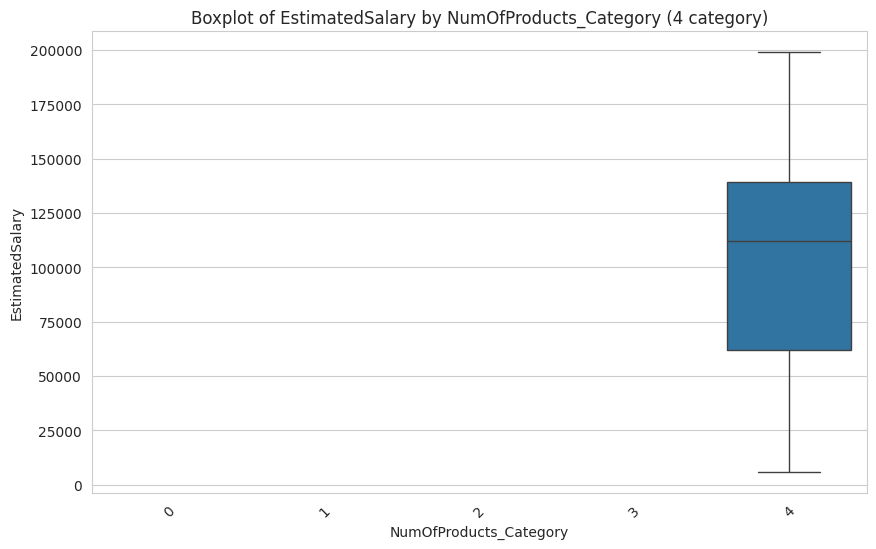

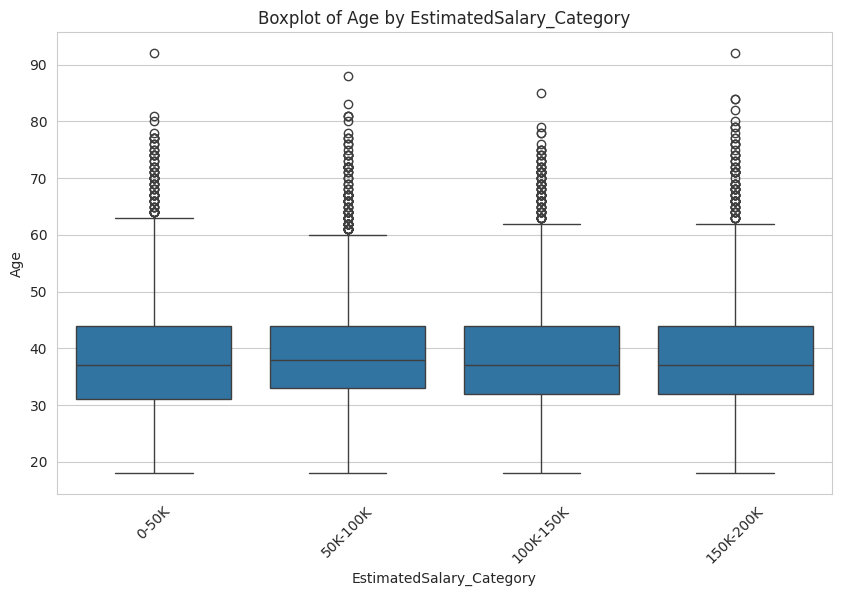

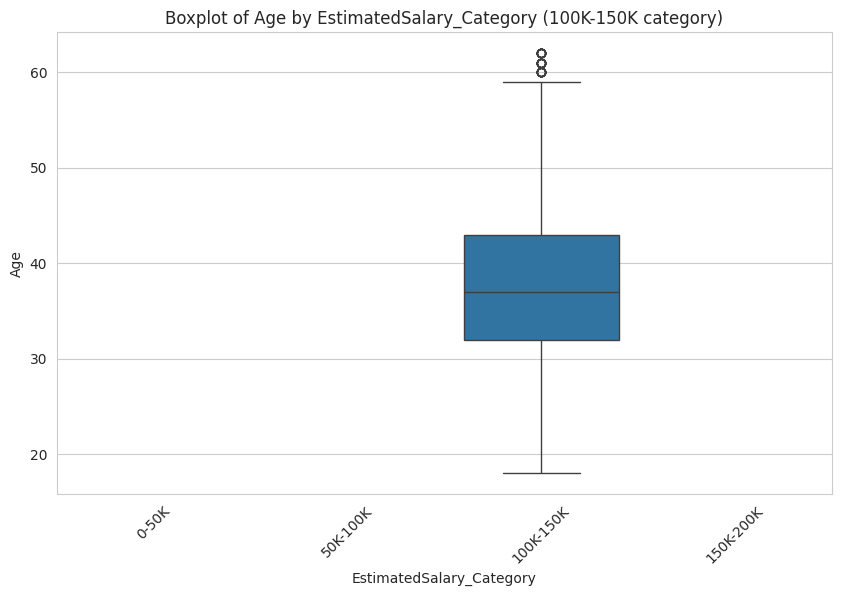

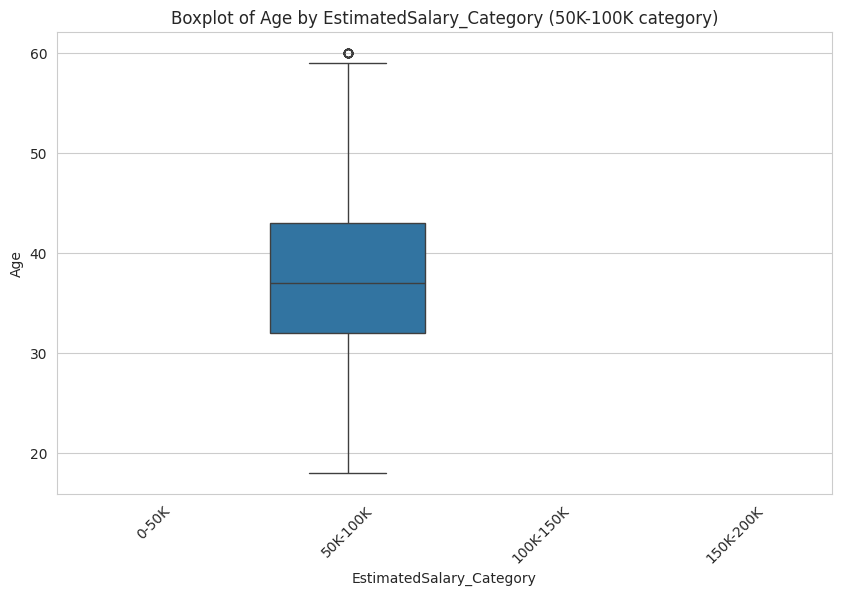

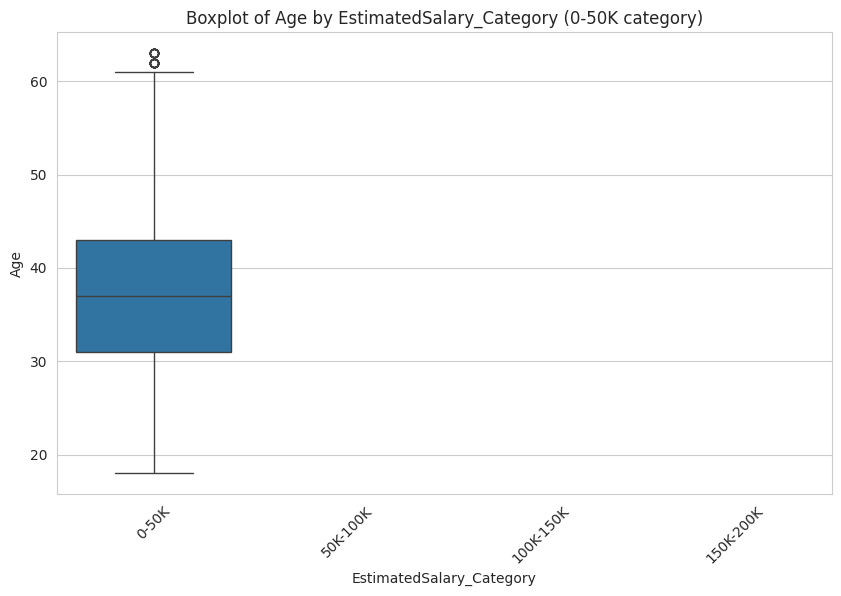

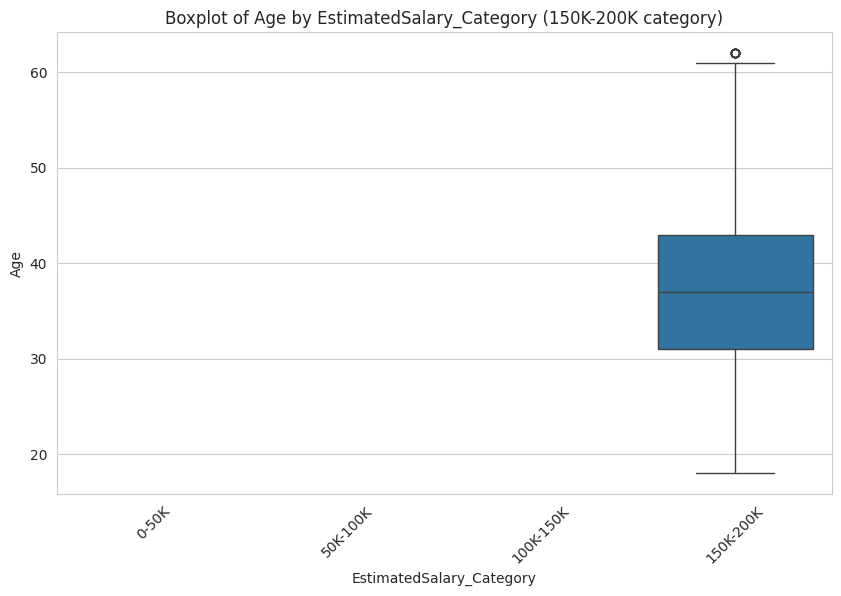

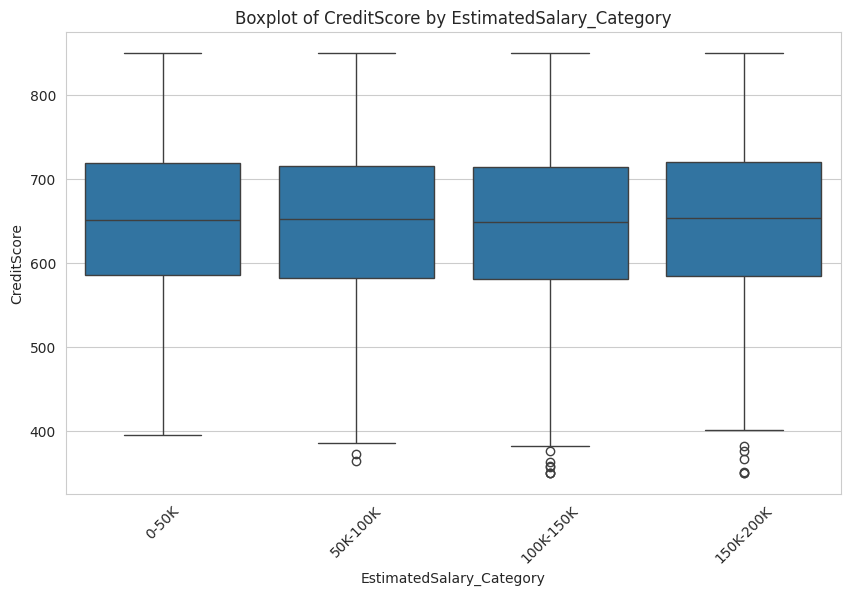

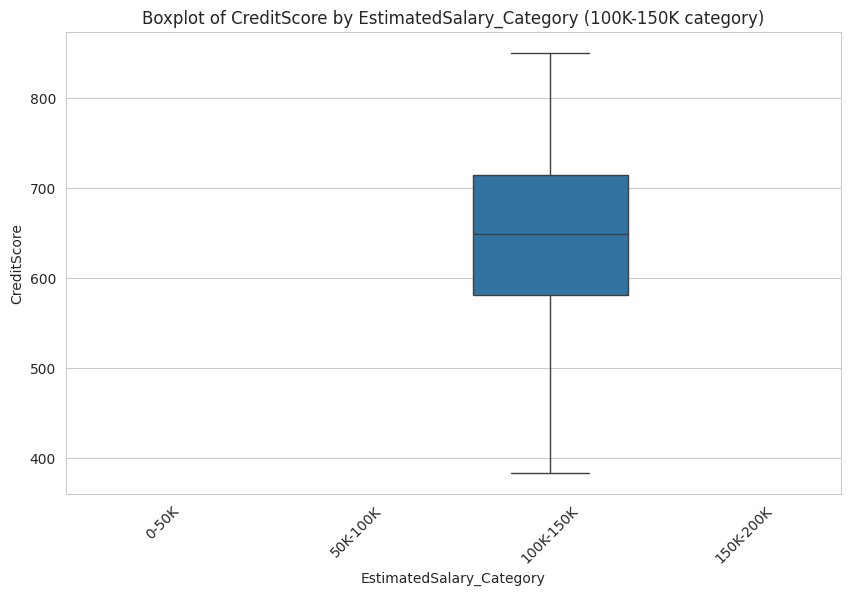

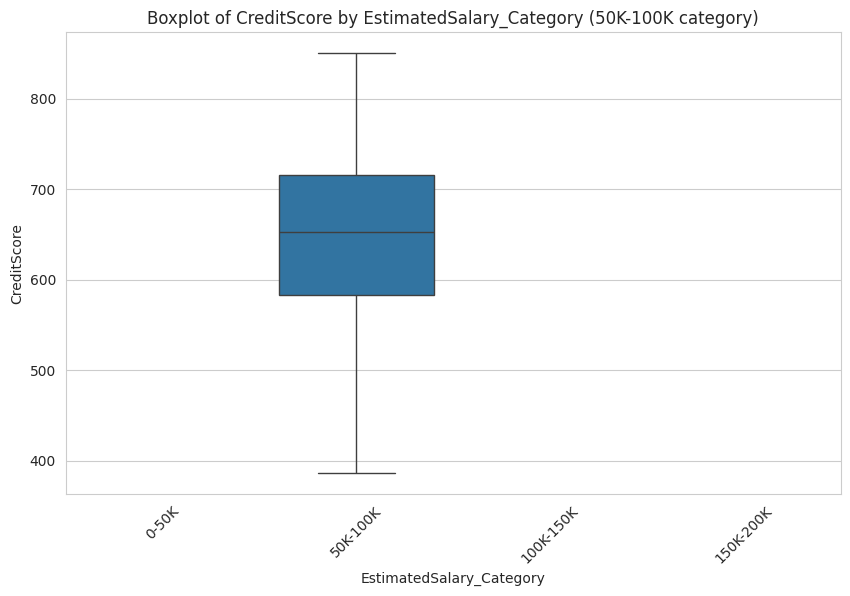

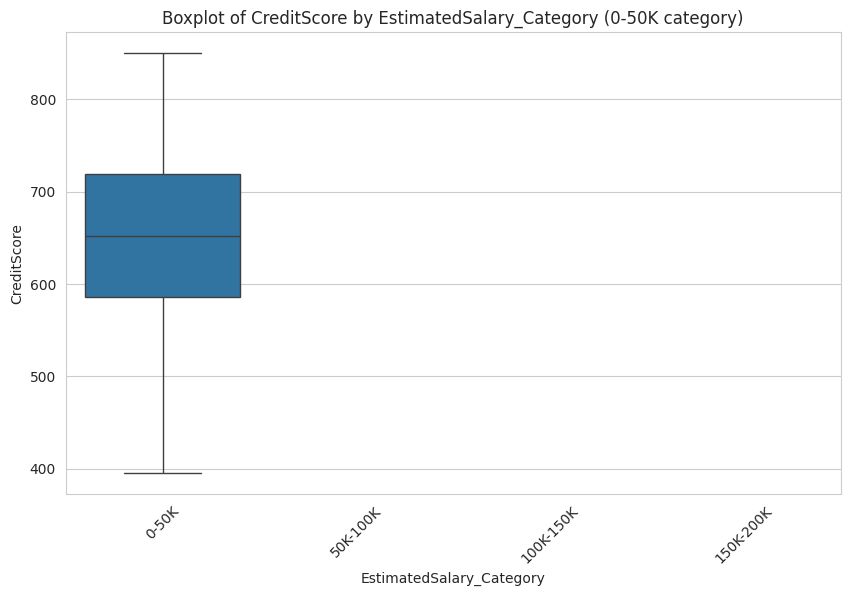

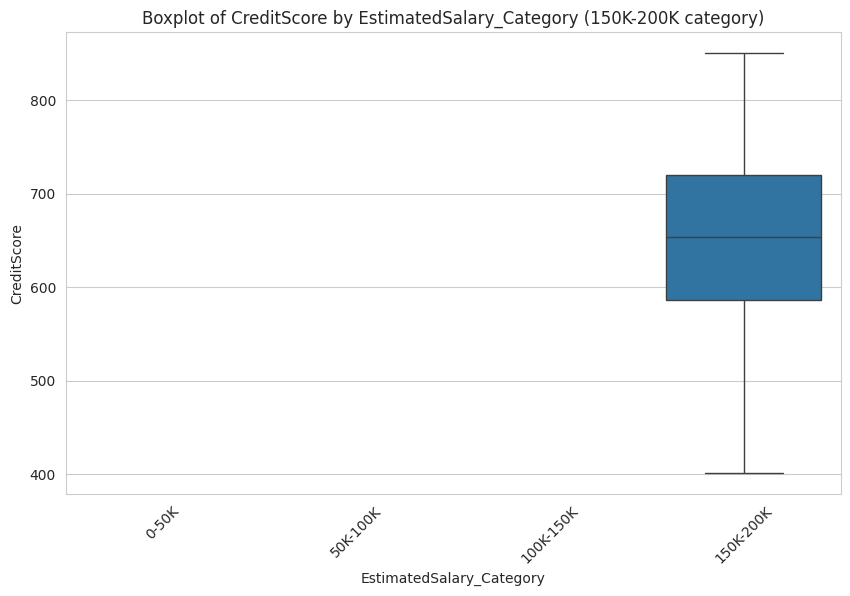

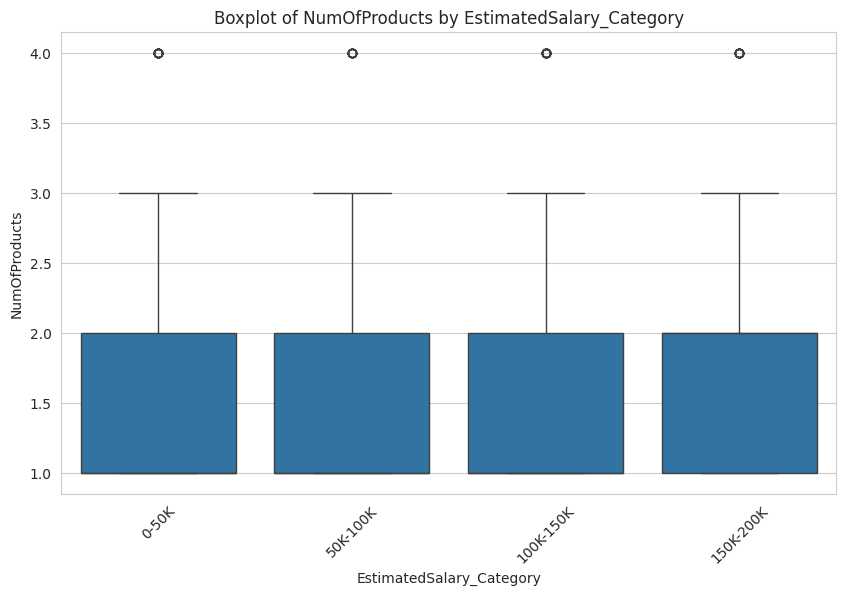

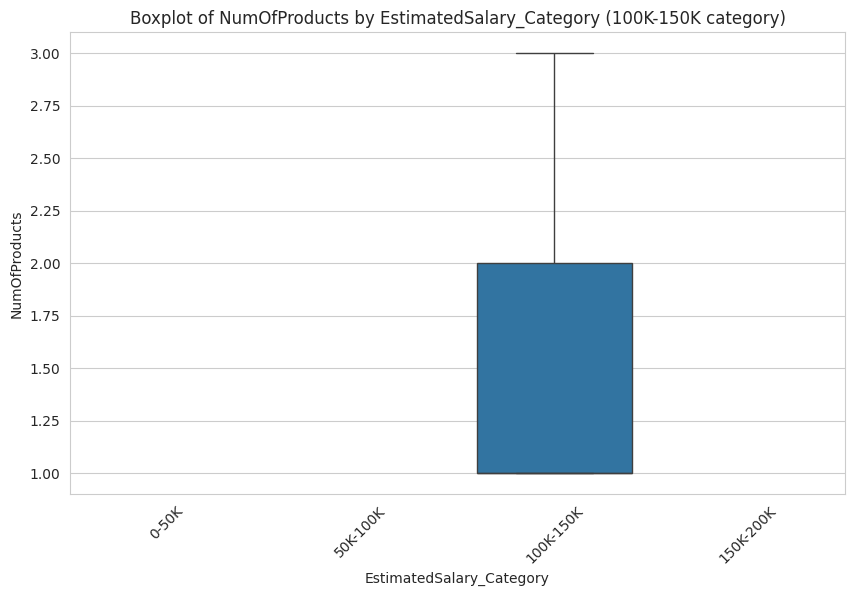

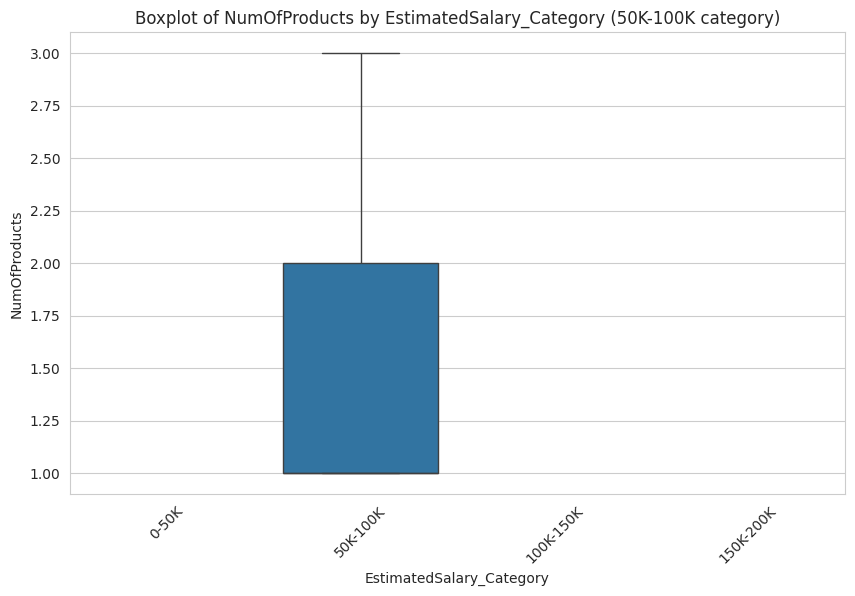

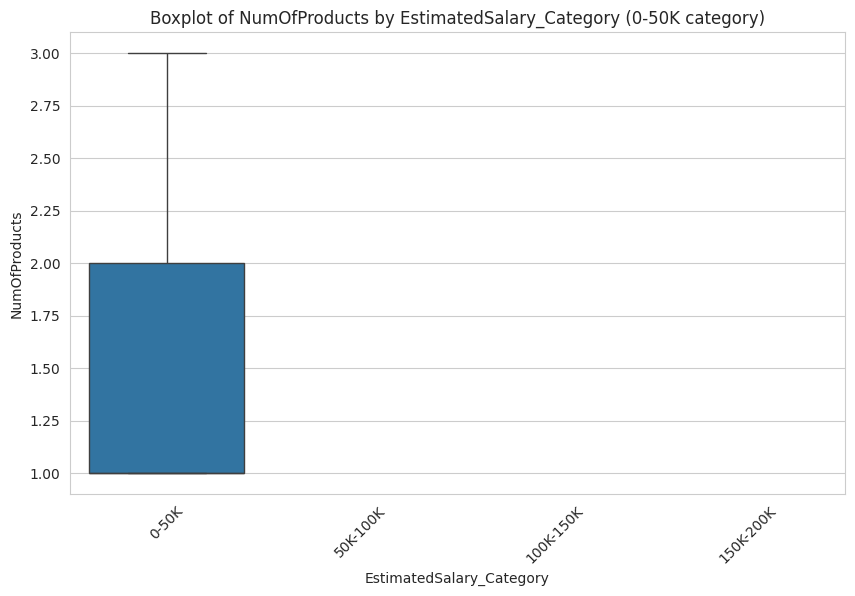

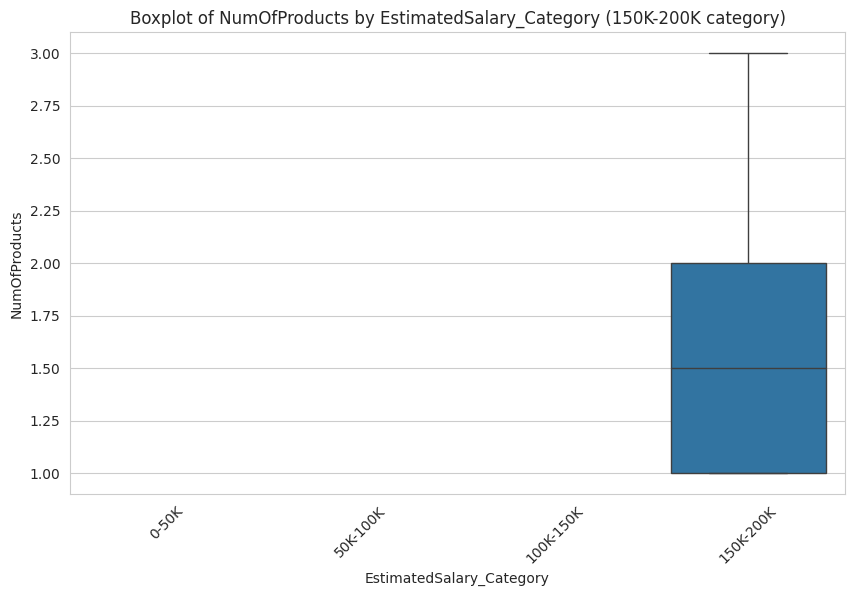

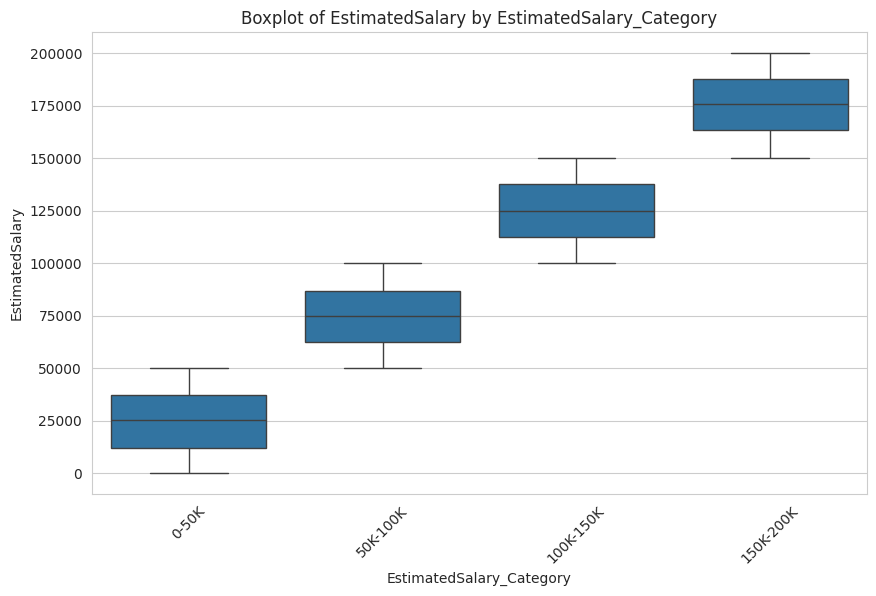

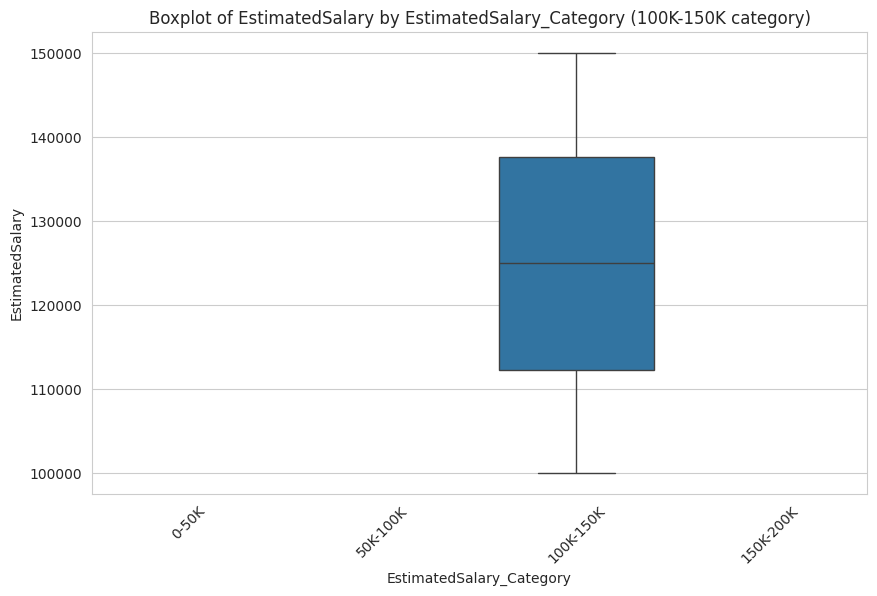

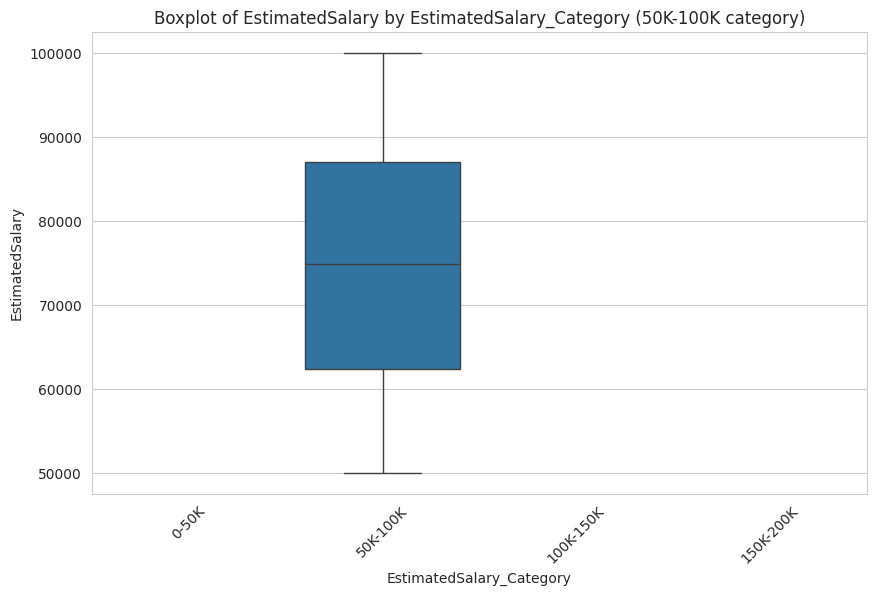

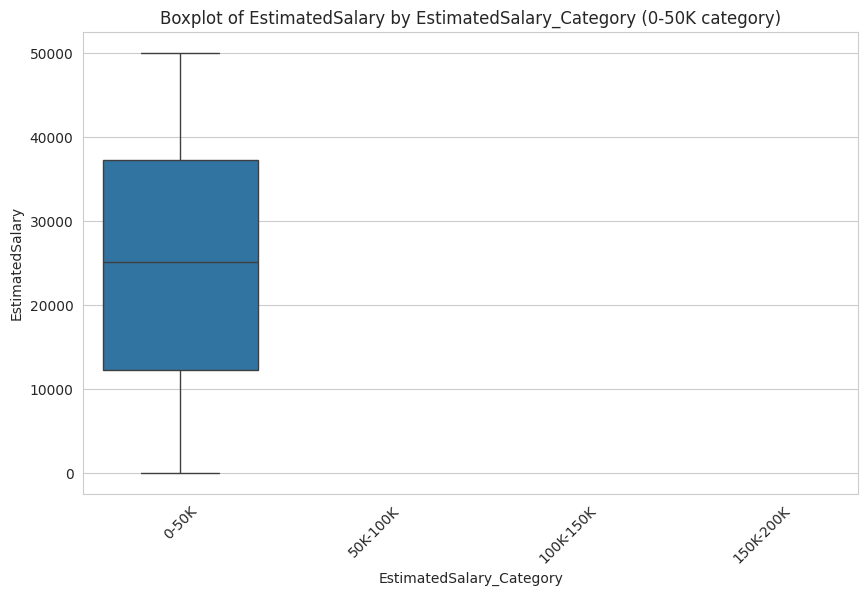

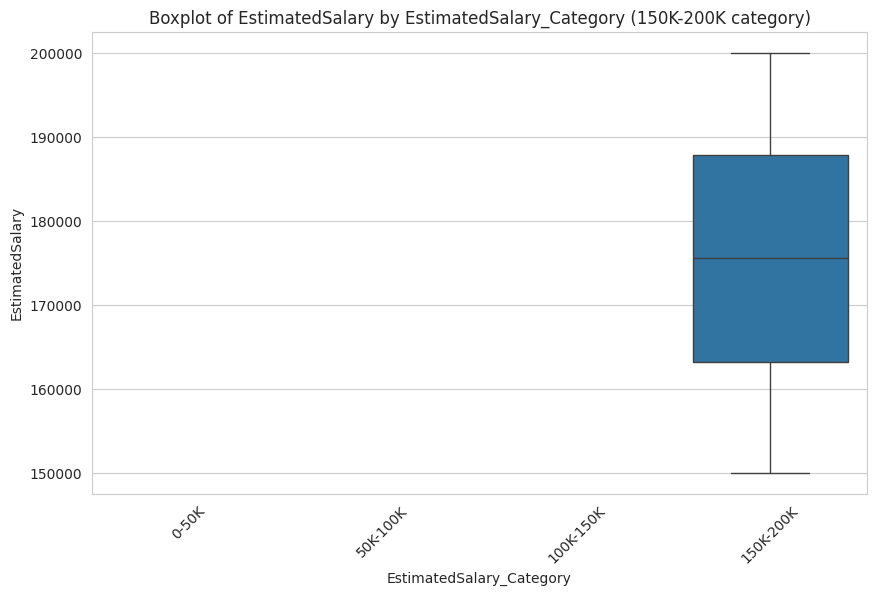

In [64]:
# Detect and correct anomalies and outliers, if any.

# Numerical variable
age_bins = [0, 25, 35, 45, 55, 65, 75, 85, 100]
creditscore_bins = [0, 400, 500, 600, 700, 800, 900]
numofproducts_bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]  # Adjusted to include 0 and 4
estimatedsalary_bins = [0, 50000, 100000, 150000, 200000]

# Categorizing 'Age', 'CreditScore', 'NumOfProducts', and 'EstimatedSalary')
categorical_columns = ['Age_Category', 'CreditScore_Category', 'NumOfProducts_Category', 'EstimatedSalary_Category']

# Assign categorical labels based on the bins for each numerical variable
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=['0-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100'])
df['CreditScore_Category'] = pd.cut(df['CreditScore'], bins=creditscore_bins, labels=['0-400', '401-500', '501-600', '601-700', '701-800', '801-900'])
df['NumOfProducts_Category'] = pd.cut(df['NumOfProducts'], bins=numofproducts_bins, labels=['0', '1', '2', '3', '4'])  # Adjusted to include 0
df['EstimatedSalary_Category'] = pd.cut(df['EstimatedSalary'], bins=estimatedsalary_bins, labels=['0-50K', '50K-100K', '100K-150K', '150K-200K'])

# List of numerical columns
numerical_columns = ['Age', 'CreditScore', 'NumOfProducts', 'EstimatedSalary']

# Iterate over each categorical column
for category_col in categorical_columns:
    # Iterate over each numerical column
    for numerical_col in numerical_columns:
        # Visualize data for each category
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=category_col, y=numerical_col, data=df)
        plt.title(f'Boxplot of {numerical_col} by {category_col}')
        plt.xlabel(category_col)
        plt.ylabel(numerical_col)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

        # Detect and correct outliers for each category
        for category_value in df[category_col].unique():
            category_df = df[df[category_col] == category_value]

            # Calculate quartiles and IQR
            q1 = category_df[numerical_col].quantile(0.25)
            q3 = category_df[numerical_col].quantile(0.75)
            iqr = q3 - q1

            # Define the outlier boundaries
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Identify outliers
            outliers = (category_df[numerical_col] < lower_bound) | (category_df[numerical_col] > upper_bound)

            # Handle outliers (e.g., remove or impute)
            # Example: Remove outliers
            cleaned_category_df = category_df[~outliers]

            # Visualize the cleaned data
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=category_col, y=numerical_col, data=cleaned_category_df)
            plt.title(f'Boxplot of {numerical_col} by {category_col} ({category_value} category)')
            plt.xlabel(category_col)
            plt.ylabel(numerical_col)
            plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
            plt.show()


####**Transformation**

In [52]:
# Normalize or standardize numerical features if required.

from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['Age', 'CreditScore', 'NumOfProducts', 'EstimatedSalary']

scaler = MinMaxScaler()

# Normalize
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

from sklearn.preprocessing import StandardScaler

numerical_columns = ['Age', 'CreditScore', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

# Standardize the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
0             1    15634602   Hargrave    -0.326221    France  Female   
1             2    15647311       Hill    -0.440036     Spain  Female   
2             3    15619304       Onio    -1.536794    France  Female   
3             4    15701354       Boni     0.501521    France  Female   
4             5    15737888   Mitchell     2.063884     Spain  Female   
...         ...         ...        ...          ...       ...     ...   
9995       9996    15606229   Obijiaku     1.246488    France    Male   
9996       9997    15569892  Johnstone    -1.391939    France    Male   
9997       9998    15584532        Liu     0.604988    France  Female   
9998       9999    15682355  Sabbatini     1.256835   Germany    Male   
9999      10000    15628319     Walker     1.463771    France  Female   

           Age  Tenure    Balance  NumOfProducts  ...  CreditScore_Category_4  \
0     0.293793       2       0.00      -0.

In [51]:
# Encode categorical variables using one-hot encoding or label encoding.

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Age' column
df['Age'] = label_encoder.fit_transform(df['Age'])

print(df)


      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave    -0.326221    France  Female   24   
1             2    15647311       Hill    -0.440036     Spain  Female   23   
2             3    15619304       Onio    -1.536794    France  Female   24   
3             4    15701354       Boni     0.501521    France  Female   21   
4             5    15737888   Mitchell     2.063884     Spain  Female   25   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku     1.246488    France    Male   21   
9996       9997    15569892  Johnstone    -1.391939    France    Male   17   
9997       9998    15584532        Liu     0.604988    France  Female   18   
9998       9999    15682355  Sabbatini     1.256835   Germany    Male   24   
9999      10000    15628319     Walker     1.463771    France  Female   10   

      Tenure    Balance  NumOfProducts  ...  CreditScore_Catego

####**Feature Engineering**

In [58]:
# Generate new features that might improve model performance

# Interaction Features
df['Age_CreditScore'] = df['Age'] * df['CreditScore']
df['Salary_NumOfProducts'] = df['EstimatedSalary'] * df['NumOfProducts']

# Polynomial Features
df['Age_Squared'] = df['Age'] ** 2

# Binning or Bucketing
bins = [0, 3, 5, 10]
labels = ['Short-Term', 'Medium-Term', 'Long-Term']
df['Tenure_Category'] = pd.cut(df['Tenure'], bins=bins, labels=labels)

# Feature Crosses
df['Geography_Gender'] = df['Geography'] + '_' + df['Gender']
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
0             1    15634602   Hargrave    -0.326221    France  Female   
1             2    15647311       Hill    -0.440036     Spain  Female   
2             3    15619304       Onio    -1.536794    France  Female   
3             4    15701354       Boni     0.501521    France  Female   
4             5    15737888   Mitchell     2.063884     Spain  Female   
...         ...         ...        ...          ...       ...     ...   
9995       9996    15606229   Obijiaku     1.246488    France    Male   
9996       9997    15569892  Johnstone    -1.391939    France    Male   
9997       9998    15584532        Liu     0.604988    France  Female   
9998       9999    15682355  Sabbatini     1.256835   Germany    Male   
9999      10000    15628319     Walker     1.463771    France  Female   

           Age  Tenure    Balance  NumOfProducts  ...  \
0     0.293793       2       0.00      -0.911583  ...   
1     0.1

In [65]:
# Perform feature selection to identify the most relevant features.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd


# Target variable
X = df.drop(['Exited'], axis=1)  # Features
y = df['Exited']  # Target variable

# Categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

model = LogisticRegression()

rfe = RFE(estimator=model, n_features_to_select=10)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', rfe)])

pipeline.fit(X, y)

selected_features = pipeline.named_steps['feature_selection'].get_support(indices=True)

print("Selected Features:", X.columns[selected_features])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KeyboardInterrupt: 

##**Part 3: Model Development and Evaluation**
Model Selection:

*   Choose at least two different machine learning algorithms suitable for
classification tasks.
*   Justify your choice of algorithms.

Training and Validation:
*   Split the dataset into training and validation sets.
*   Train your models using the training set.

Performance Evaluation:
*   Evaluate each model's performance using appropriate metrics.
*   Discuss the results and select the best-performing model.

####**Model Selection**

####**Random Forest:**

*   Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes of the individual trees.
*   It's robust to overfitting and works well with both categorical and numerical features.
*   Random Forest can handle large datasets with high dimensionality.

####**Support Vector Machine (SVM):**

*   SVM is a powerful supervised learning algorithm used for classification tasks.
*   It finds the hyperplane that best separates classes in the feature space.
*   SVM is effective in high-dimensional spaces and is versatile due to different kernel functions (linear, polynomial, radial basis function, etc.) that can be used to handle non-linear decision boundaries.

####**Random Forest:**


*   **Robustness to Overfitting:** Random Forest tends to be less prone to overfitting compared to individual decision trees. This is particularly beneficial if the dataset contains noisy or complex relationships.
*   **Handling Categorical Variables:** Random Forest can handle both numerical and categorical features effectively without requiring one-hot encoding. Since the dataset contains categorical variables like 'Geography' and 'Gender', Random Forest can handle them without additional preprocessing.
*   **Ensemble of Decision Trees:** Random Forest constructs multiple decision trees during training, which helps capture complex relationships in the data and provides more robust predictions.
*   **Feature Importance:** Random Forest can provide insights into feature importance, which can be useful for understanding the factors driving customer churn.


####**Support Vector Machine (SVM):**

*   **Effective in High-Dimensional Spaces:** SVM works well in high-dimensional feature spaces, making it suitable for datasets with many features. It can handle feature spaces that are larger than the number of samples, which is beneficial if the dataset has many features.
*   **Ability to Handle Non-Linear Decision Boundaries:** SVM with non-linear kernel functions (such as radial basis function kernel) can capture complex decision boundaries in the data. This is useful if the relationship between features and the target variable is non-linear.
*   **Works with Small to Medium-Sized Datasets:** SVM is suitable for datasets with a moderate number of samples. If the dataset size is not too large, SVM can provide good performance without requiring excessive computational resources.



####**Training and Validation:**

In [66]:
# Split the dataset into training and validation sets.

from sklearn.model_selection import train_test_split

X = df.drop(['Exited'], axis=1)  # Features
y = df['Exited']  # Target variable

# Split 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (8000, 13) (8000,)
Validation set shape: (2000, 13) (2000,)


In [68]:
# Train your models using the training set.

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


X = df.drop(['Exited'], axis=1)  # Features
y = df['Exited']  # Target variable

# Split 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply preprocessing to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # Use linear kernel for simplicity

# Create pipelines for preprocessing and training for each model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', rf_classifier)])

svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', svm_classifier)])

# Train the models
rf_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Surname', 'Geography',
                                                   'Gender'])])),
                ('classifier', SVC(kernel='linear', random_state=42))])

####**Performance Evaluation:**

In [69]:
# Discuss the results and select the best-performing model.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions for Random Forest
rf_preds = rf_pipeline.predict(X_val)

# Predictions for SVM
svm_preds = svm_pipeline.predict(X_val)

# Calculate Random Forest
rf_accuracy = accuracy_score(y_val, rf_preds)
rf_precision = precision_score(y_val, rf_preds)
rf_recall = recall_score(y_val, rf_preds)
rf_f1 = f1_score(y_val, rf_preds)
rf_roc_auc = roc_auc_score(y_val, rf_preds)

# Calculate SVM
svm_accuracy = accuracy_score(y_val, svm_preds)
svm_precision = precision_score(y_val, svm_preds)
svm_recall = recall_score(y_val, svm_preds)
svm_f1 = f1_score(y_val, svm_preds)
svm_roc_auc = roc_auc_score(y_val, svm_preds)

# Print Random Forest
print("Random Forest Performance:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)
print()

# Print SVM
print("Support Vector Machine (SVM) Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("ROC AUC Score:", svm_roc_auc)

Random Forest Performance:
Accuracy: 0.7665
Precision: 0.22794117647058823
Recall: 0.07888040712468193
F1 Score: 0.1172022684310019
ROC AUC Score: 0.5067706329338407

Support Vector Machine (SVM) Performance:
Accuracy: 0.78
Precision: 0.16901408450704225
Recall: 0.030534351145038167
F1 Score: 0.05172413793103448
ROC AUC Score: 0.49690998826698085
